# Proyecto final - Telco Customer Churn
Curso: Fundamentos de aprendizaje de máquina

Grupo 1:


*   Miguel Vega
*   Walter Valverde
*   Jhair Choco

Dataset descargado de https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Procedimiento adaptado de https://github.com/ageron/handson-ml2/blob/master/ml-project-checklist.md


# Objetivos
El objetivo del proyecto es la elaboración de un modelo de aprendizaje de máquina para la predicción de churn de suscriptores o clientes para una empresa de telecomunicaciones.

Con dicho modelo se podrá predecir si un cliente es propenso a cancelar su suscripción o no y también qué características son las más importantes a la hora de decidir.

A nivel de negocio, el modelo podrá servir para aumentar la retención de clientes a través de campañas o promociones, así como para mejoras a nivel operativo para lograr una mayor satisfacción o experiencia de cliente.

# Inicialización

In [ ]:
# Cargar librerías
import re
import math
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Definir opciones generales
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Lectura del dataset

In [ ]:
# Descargar archivos
!wget -O 'WA_Fn-UseC_-Telco-Customer-Churn.csv' 'https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
!wget -O 'grid_search-1.csv' 'https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/grid_search-1.csv'
!wget -O 'grid_search_bal-1.csv' 'https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/grid_search_bal-1.csv'

--2023-11-18 14:31:07--  https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 947.71K  --.-KB/s    in 0.06s   

2023-11-18 14:31:07 (15.8 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [970457/970457]

--2023-11-18 14:31:07--  https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/grid_search-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

In [ ]:
df_orig = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_orig.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


El dataset cuenta con las siguientes columnas según la documentación:

|Nombre|Descripción|
|---|---|
|customerID|Identificador del cliente|
|gender|Género del cliente|
|SeniorCitizen|Indica si el cliente es adulto mayor|
|Partner|Indicas si el cliente tiene un partner|
|Dependantas|Indica si el cliente tiene dependientes|
|tenure|Cantidad de meses de suscripción del cliente|
|PhoneService|Indica si el cliente tiene servicio telefónico|
|MultipleLines|Indica si el cliente tiene varias líneas telefónicas|
|InternetService|Indica el tipo de servicio de internet del cliente|
|OnlineSecurity|Indica si tiene seguridad online en su paquete de internet|
|OnlineBackup|Indica si tiene backups online en su paquete de internet|
|DeviceProtection|Indica si tiene protección de dispositivos en su paquete de internet|
|TechSupport|Indica si tiene soporte técnico en su paquete de internet|
|StreamingTV|Indica si tiene el servicio de streaming tv en su paquete de internet|
|StreamingMovies|Indica si tiene el servicio de streaming de películas en su paquete de internet|
|Contract|Indica el tipo de contrato del cliente|
|PaperlessBilling|Indica si el clientetiene facturación electrónica|
|PaymentMethod|Método de pago del cliente|
|MonthlyCharges|Cargos mensuales del cliente|
|TotalCharges|Cargos históricos acumulados del cliente|
|Churn|Etiqueta|Indica si el cliente canceló su sucripción|

In [ ]:
df_orig.shape

(7043, 21)

El dataset tiene 7043 instancias, utilizaremos un 20% para el conjunto de pruebas

In [ ]:
df_orig.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Llama la atención que SeniorCitizen sea la única variable categórica con tipo de dato Entero. Así mismo, TotalCharges debería ser numérica.

## Preprocesamiento de datos
Por conveniencia, se transformarán algunos datos previo a su visualización.

*SeniorCitizen* es una característica categórica. Por el momento la pasaremos a Yes/No como el resto de características categóricas del dataset. De tal manera, no se mezclará con los datos numéricos

In [ ]:
df_orig['SeniorCitizen'] = df_orig['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else ('No' if x==0 else x))
df_orig['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

*TotalCharges* debería ser *float64* y aparece como *object*.

In [ ]:
df_orig['TotalCharges'].isna().sum()

0

Convertimos a NaN los vacíos y convertimos a float

In [ ]:
df_orig['TotalCharges'] = df_orig['TotalCharges'].replace(' ', np.nan)
df_orig['TotalCharges'] = pd.to_numeric(df_orig['TotalCharges'], errors='raise')
df_orig['TotalCharges'].isna().sum()

11

## Vistazo inicial
Realizamos un vistazo inicial antes de generar el conjunto de pruebas

In [ ]:
df_orig.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7032.000
mean,32.371,64.762,2283.300
std,24.559,30.090,2266.771
min,0.000,18.250,18.800
25%,9.000,35.500,401.450
50%,29.000,70.350,1397.475
75%,55.000,89.850,3794.738
max,72.000,118.750,8684.800


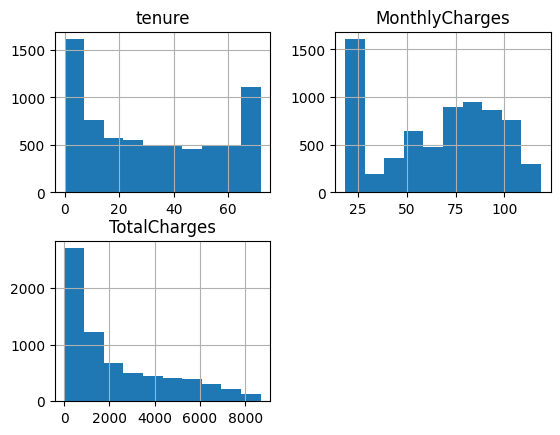

In [ ]:
fig = df_orig.hist()

A simple vista se puede observar lo siguiente:


*   tenure acumula varias instancias en valores muy bajos o muy altos, probablemente haya mayor cantidad de clientes nuevos y clientes antiguos. Tal vez a partir de cierto mes la satisfacción del cliente o la presión de la competencia comienza a ocasionar cancelaciones
*   MonthlyCharges acumula varias instancias en valores bajos, probablemnte clientes con planes más baratos
*   TotalCharges tiene uns distribución sesgada, veremos cómo atacar este fenómeno después de crear el conjunto de pruebas


## Conjunto de pruebas
Se valida que el conjunto de datos está desbalanceado, por lo que hay que tener cuidado al armar el conjunto de datos de entrenamiento

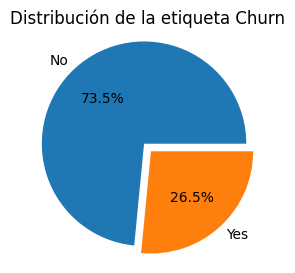

In [ ]:
plt.figure(figsize=(3, 3))
plt.pie(df_orig['Churn'].value_counts(normalize=True) * 100, explode=(0.1, 0), labels=df_orig['Churn'].unique(), autopct='%1.1f%%')
plt.axis('equal')

plt.title('Distribución de la etiqueta Churn')
plt.show()

Se generará un conjunto de pruebas balanceado

In [ ]:
df_orig['Churn'].value_counts() / len(df_orig)

No    0.735
Yes   0.265
Name: Churn, dtype: float64

Se utilizará la clase StratifiedShuffleSplit para generar los conjuntos estratificados por la etiqueta Churn. El tamaño del conjunto de pruebas será de un 20% del dataset

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_orig, df_orig['Churn']):
  df_train = df_orig.loc[train_index]
  df_test = df_orig.loc[test_index]

Se valida la distribución

In [ ]:
df_train['Churn'].value_counts() / len(df_train)

No    0.735
Yes   0.265
Name: Churn, dtype: float64

In [ ]:
df_test['Churn'].value_counts() / len(df_test)

No    0.735
Yes   0.265
Name: Churn, dtype: float64

# Exporación de datos
Se estudiarán las columnas del conjunto de entrenamiento y sus características:


*   Nombre
*   Tipo de dato
*   Valores faltantes
*   Utilidad
*   Valores atípicos (para características numéricas)
*   Tipo de distribución (para características numéricas)
*   Correlaciones
*   Posibles transformaciones

## Visualización de los datos
A continuación, se visualizarán los datos con el fin de encontrar mayor información de las características



### Datos numéricos

In [ ]:
df = df_train.copy()

In [ ]:
car_num = df.select_dtypes(include=['float64','int64']).columns.to_list()
car_num

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5634.000,5634.000,5626.000
mean,32.485,64.930,2302.604
std,24.569,30.138,2279.173
min,0.000,18.400,18.850
25%,9.000,35.663,407.275
50%,29.000,70.500,1398.125
75%,55.000,90.000,3838.613
max,72.000,118.750,8684.800


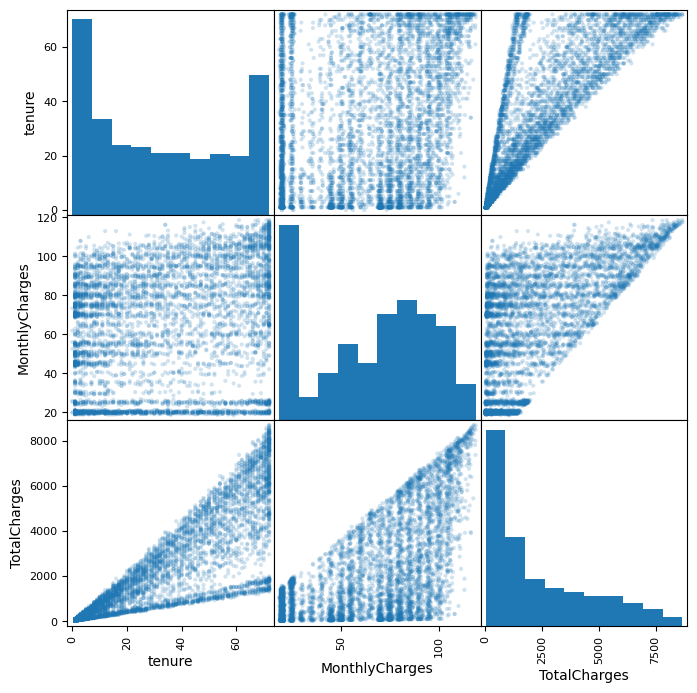

In [ ]:
from pandas.plotting import scatter_matrix
fig = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist')

En el gráfico se puede observar que la característica TotalCharges tiene una distribución sesgada.

#### Valores atípicos

Se procede a visualizar la característica TotalCharges

In [ ]:
df['TotalCharges'].skew()

0.9475162595460518

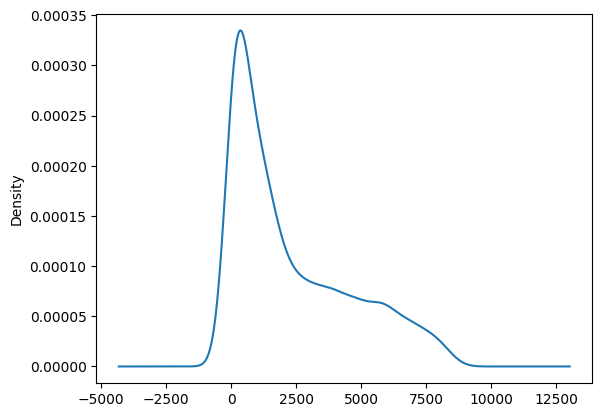

In [ ]:
fig = df['TotalCharges'].plot.kde()

<Axes: >

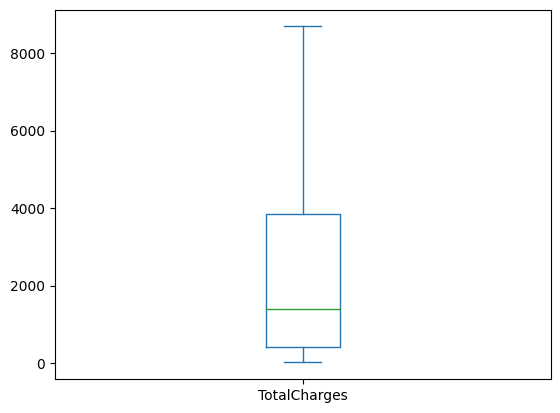

In [ ]:
df['TotalCharges'].plot.box()

Para reducir el skew o asímetría y el impacto de los valores atípicos de la cola derecha, se podría aplicar un logaritmo en la ingeniería de características.

In [ ]:
df["TotalChargesLog"] = df["TotalCharges"].apply(np.log)

In [ ]:
df['TotalChargesLog'].skew()

-0.7551070489827763

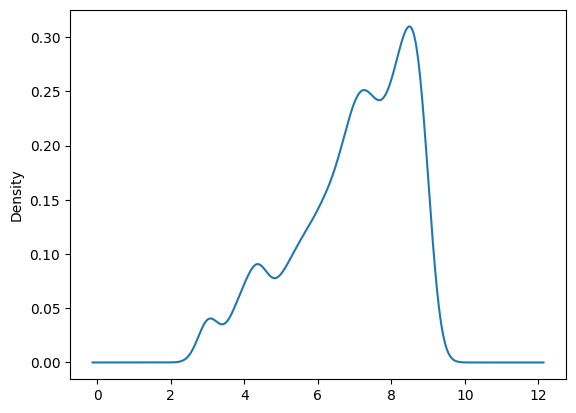

In [ ]:
fig = df['TotalChargesLog'].plot.kde()

La asimetría se ha reducido un poco (de 0.95 a 0.75), por lo que procederemos con esta transformación.

#### Correlación
Visualizamos las variables numéricas vs la etiqueta Churn y revisamos la matriz de correlación

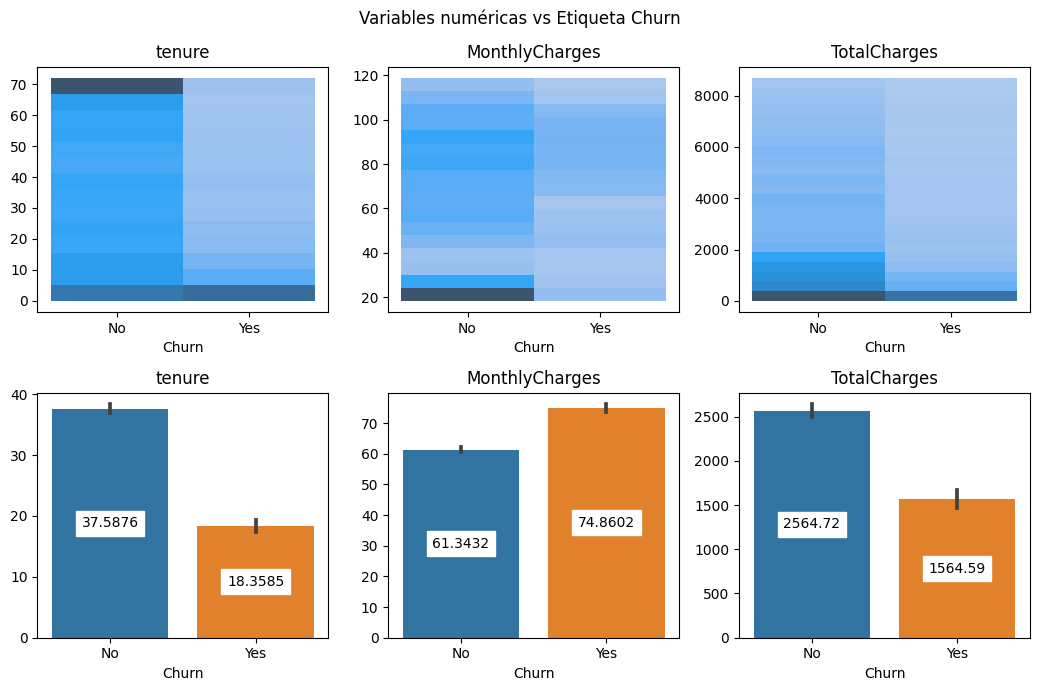

In [ ]:
fig, axes = plt.subplots(2, len(car_num), figsize=(len(car_num) * 3.5, 2 * 3.5))
fig.suptitle('Variables numéricas vs Etiqueta Churn')
axes = axes.flatten()

for yi in range(0,len(car_num)):
  ax = axes[yi]
  ax.set_title(car_num[yi])
  sns.histplot(data=df.fillna(0), x='Churn', y=car_num[yi], ax=ax)
  ax.set_ylabel('')

for yi in range(len(car_num),len(car_num)*2):
  ax = axes[yi]
  ax.set_title(car_num[yi-len(car_num)])
  sns.barplot(data=df.fillna(0), x='Churn', y=car_num[yi-len(car_num)], ax=ax, estimator=np.mean)
  ax.bar_label(ax.containers[0], label_type="center", backgroundcolor="w");
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

A continuación, visualizamos la matriz de correlación. Convertimos la etiqeuta a entero para ver si nos da alguna información.

In [ ]:
df['Churn_int'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
car_num.append('Churn_int')

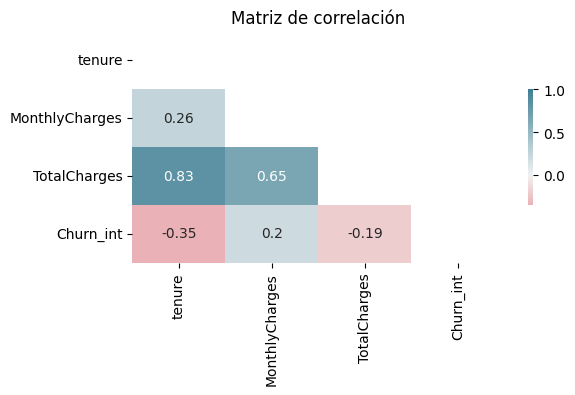

In [ ]:
corr = df[car_num].corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 3))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, cbar_kws={"shrink": .5}, annot=True)
plt.title("Matriz de correlación")
fig.show()

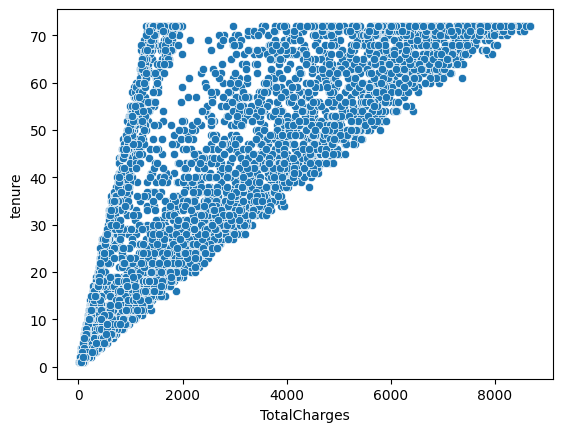

In [ ]:
ax = sns.scatterplot(x="TotalCharges", y="tenure", data=df)

La matriz indica que la correlación y entre las característica TotalCharges y tenure es alta, lo cual es lógico, pues entre más tiempo se esté suscrito a un servicio, aumentan los cargos totales. Lo mismo se puede concluir al visualizar el scatterplot. No obstante, no se encuentra necesario unificar ambas características o retirar alguna, pues se consideran ambas variables lo suficientemente importantes y nos pueden dar buenas perspectivas en relación al problema.

### Datos categóricos

In [ ]:
car_cat = df.select_dtypes(include=['object']).columns
car_cat = car_cat.drop(["customerID", "Churn"])
len(car_cat)

16

Se grafican las variables categóricas vs la etiqueta churn

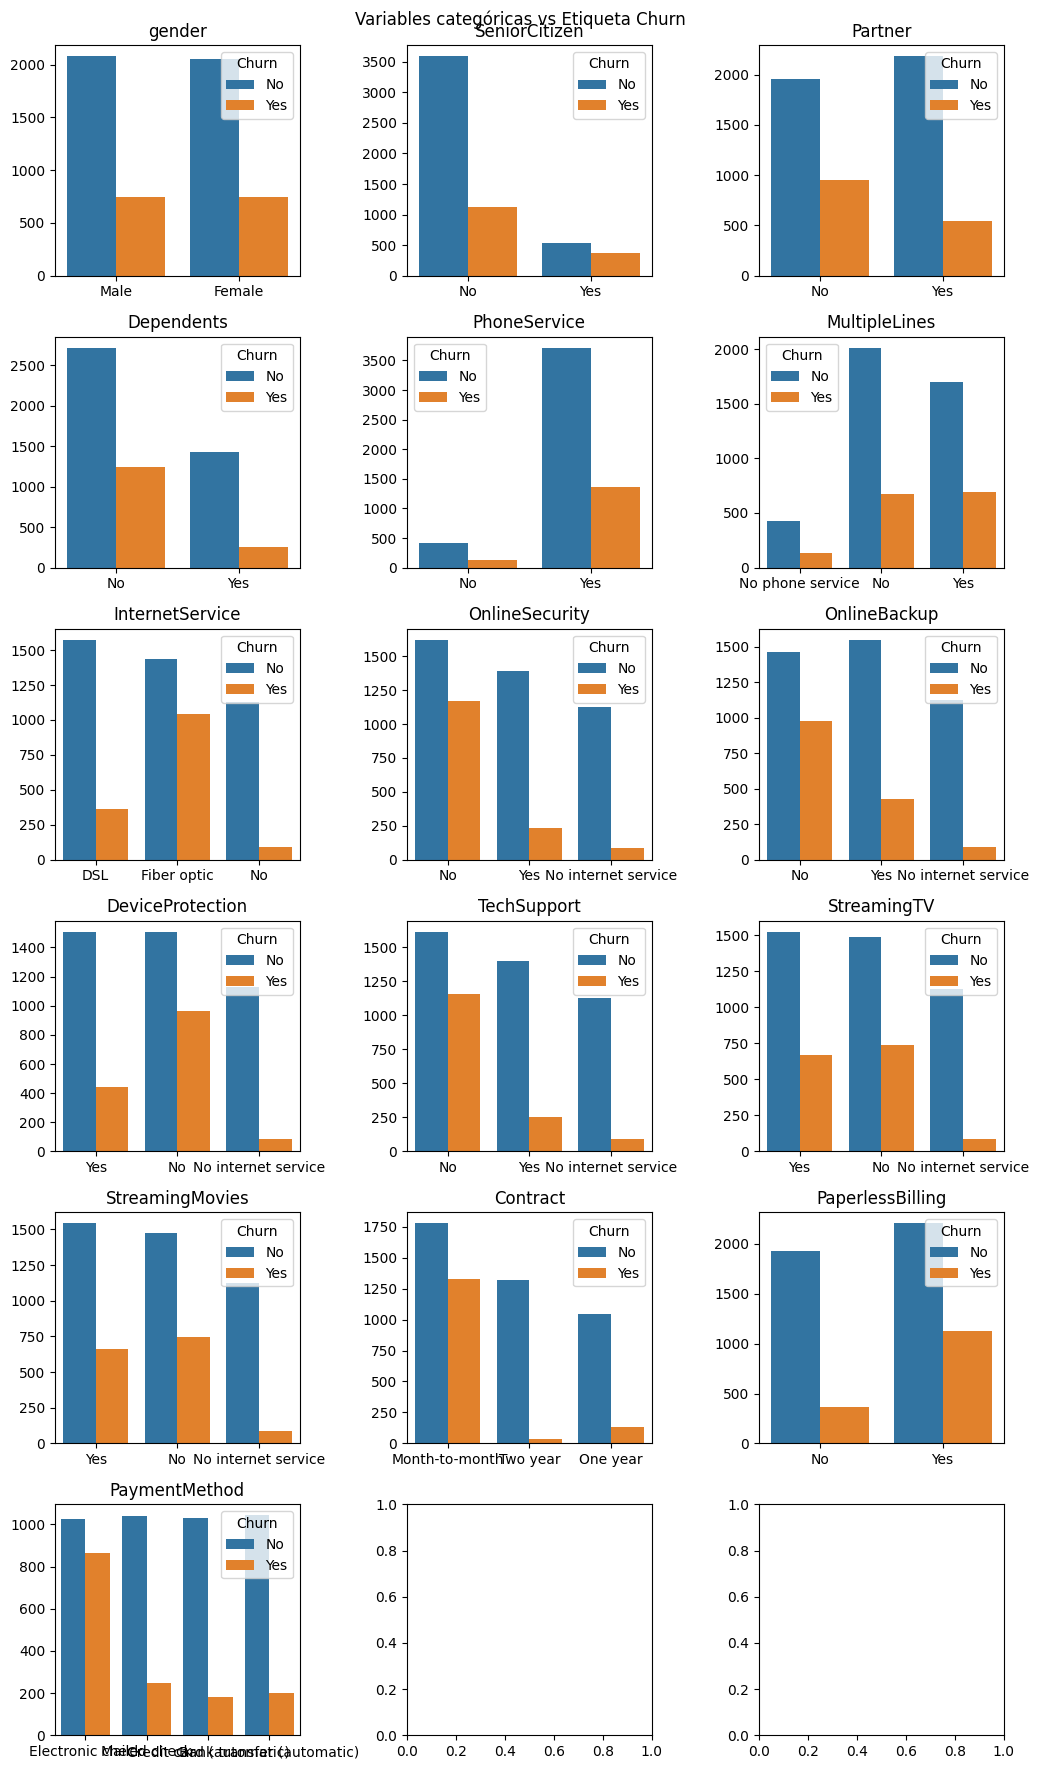

In [ ]:
n_columnas = 3
n_filas = math.ceil(len(car_cat)/n_columnas)
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 3.5, n_filas * 3))
fig.suptitle('Variables categóricas vs Etiqueta Churn')
axes = axes.flatten()

for yi in range(0,len(car_cat)):
  ax = axes[yi]
  ax.set_title(car_cat[yi])
  sns.countplot(data=df, hue='Churn', x=car_cat[yi], ax=ax)
  ax.set_ylabel('')
  ax.set_xlabel('')

plt.tight_layout()
plt.show()

Las principales observaciones son las siguientes:


*   La categoría Month-To-Month en Contract concentra en su mayoría los Churn en relación a las otras
*   Análogamnete, los Churn por InternetService están concentrados en FiberOptic
*   Los Churn por PaymentMethod se concentran desproporcionalmente en la categoría ElectronicCheck



#### Categorías redundantes
Para las características que tienen más de una clase se utilizará el OneHotEncoder para la generación de las categorías dummy. No obstante, hay unas categorías de dichas características que parecen redundantes y si las retiramos podemos convertir dichas características en binarias y reducir la dimensionalidad

Se visualiza que la característica MultipleLines tiene una clase 'No phone service'. Así mismo, ya existe una característica PhoneService. Nuestra hipótesis es que todas las instancias con PhoneService = No tendrán MultipleLines = 'No phone service'

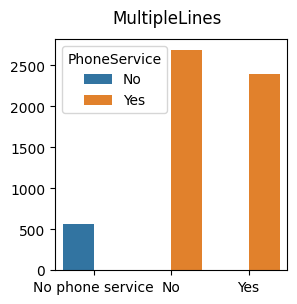

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
fig.suptitle('MultipleLines')
sns.countplot(data=df, hue='PhoneService', x='MultipleLines')
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

Se confirma que siempre que PhoneService = No, MultipleLines = 'No phone service'. Por lo que si tenemos una categoría dummy MultipleLines_NoPhoneService, esta sería redundante con PhoneService. Por ello, se pasarán todos los valores de 'No phone service' a No y se mantendrá solo una característica binaria MultipleLines

Se realiza el mismo ejercicio para InternetService y OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies

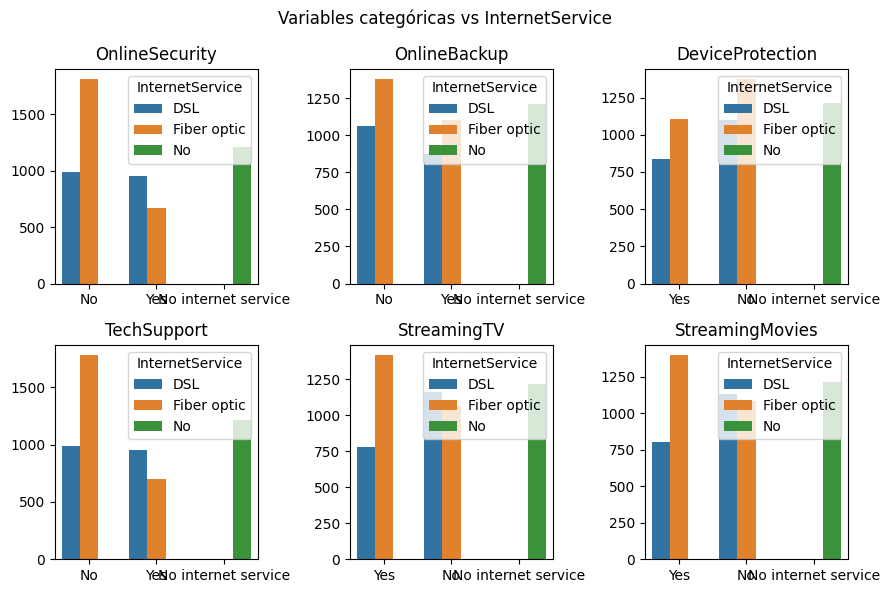

In [ ]:
car_redundantes = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
n_columnas = 3
n_filas = 2
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 3, n_filas * 3))
fig.suptitle('Variables categóricas vs InternetService')
axes = axes.flatten()

for yi in range(0,len(car_redundantes)):
  ax = axes[yi]
  ax.set_title(car_redundantes[yi])
  sns.countplot(data=df, hue='InternetService', x=car_redundantes[yi], ax=ax)
  ax.set_ylabel('')
  ax.set_xlabel('')

plt.tight_layout()
plt.show()

Se confirma que siempre que alguna de dichas características es igual a 'No internet service', InternetService = No, por lo que si se tuviese una característica dummy para 'No internet service', contendría la misma información que InternetService

### Valores faltantes

In [ ]:
df.count()

customerID          5634
gender              5634
SeniorCitizen       5634
Partner             5634
Dependents          5634
tenure              5634
PhoneService        5634
MultipleLines       5634
InternetService     5634
OnlineSecurity      5634
OnlineBackup        5634
DeviceProtection    5634
TechSupport         5634
StreamingTV         5634
StreamingMovies     5634
Contract            5634
PaperlessBilling    5634
PaymentMethod       5634
MonthlyCharges      5634
TotalCharges        5626
Churn               5634
TotalChargesLog     5626
Churn_int           5634
dtype: int64

Solo la característica TotalCharges tiene valores faltantes. Visualizaremos los datos faltantes

In [ ]:
df[['tenure','TotalCharges','MonthlyCharges','Churn']][df['TotalCharges'].isna()]

,tenure,TotalCharges,MonthlyCharges,Churn
6670,0,NaN,73.350,No
4380,0,NaN,20.000,No
3826,0,NaN,25.350,No
488,0,NaN,52.550,No
1082,0,NaN,25.750,No
1340,0,NaN,56.050,No
6754,0,NaN,61.900,No
3331,0,NaN,19.850,No


Se visualiza que el tenure es 0 para dichas instancias. Por ello, se rellenará el campo TotalCharges con el valor de MonhtlyCharges, pues son clientes a los que todavía no se les ha facturado su primer pago. Otra opción sería asignarle 0, pero complicaría la conversión logarítmica.

In [ ]:
unique_vals = df.select_dtypes("O").nunique()
unique_vals

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

## Resumen de los datos
A continuación, se resumen las principales características de las columnas del archivo.

|Nombre|Tipo|Tipo de dato|Rango de valores|Comentarios|
|---|---|---|---|---|
|customerID||Texto||Se retirará la característica, pues no da información|
|gender|Binaria|Texto|Male, Female|Se utilizará OrdinalEncoder, pues es binario|
|SeniorCitizen|Binaria|Entero|1=Sí, 0=No|Se utilizará OrdinalEncoder, pues es binario|
|Partner|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|Dependantas|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|tenure|Numérica|Entero|[0-72]|Se usará StandardScaler|
|PhoneService|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|MultipleLines|Binaria|Texto|Yes, No, No phone service|Se homologará No con No phone service y se utilizará OrdinalEncoder como si fuese binario|
|InternetService|Categórica|Texto|DSL, Fiber optic, No|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|OnlineSecurity|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|OnlineBackup|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|DeviceProtection|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|TechSupport|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|StreamingTV|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|StreamingMovies|Binaria|Texto|Yes, No, No internet service|Se homologará No con No internet service y se utilizará OrdinalEncoder como si fuese binario|
|Contract|Categórica|Texto|Month-to-month, One year, Two year|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|PaperlessBilling|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|PaymentMethod|Categórica|Texto|Electronic check, Mailed check, Bank transfer, Credit card|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|MonthlyCharges|Numérico|Real|[18.25,118.75]|Se utilizará StandardScaler|
|TotalCharges|Numérico|Real|[18.8,8684.80]|Se imputarán MonthlyCharges a los valores faltantes, se aplicará logaritmo para reducir la asimetrías y se utilizará StandarScaler|
|Churn|Etiqueta|Texto|Yes, No|Se utilizará el LabelEncoder para el entrenamiento|


# Preparación de los datos

En esta sección, se procesará el dataset para que quede listo para su entrenamiento.

## Eliminar características

Se retiran las característiacs que no proporcionan información

In [ ]:
X_train_pre = df_train.drop(columns=['customerID','Churn'], errors='ignore').copy()
X_test_pre = df_test.drop(columns=['customerID','Churn'], errors='ignore').copy()

Se separa la etiqueta de los conjuntos de datos

In [ ]:
y_train_pre = df_train['Churn'].copy()
y_test_pre = df_test['Churn'].copy()

## Imputar valores faltantes

Se imputarán los valores faltantes a TotalCharges

In [ ]:
X_train_pre['TotalCharges'].isna().sum()

8

In [ ]:
X_train_pre['TotalCharges'].fillna(X_train_pre['MonthlyCharges'],inplace=True)
X_test_pre['TotalCharges'].fillna(X_test_pre['MonthlyCharges'],inplace=True)

In [ ]:
X_train_pre['TotalCharges'].isna().sum()

0

In [ ]:
X_train_pre.describe() # se completa el count

,tenure,MonthlyCharges,TotalCharges
count,5634.000,5634.000,5634.000
mean,32.485,64.930,2299.394
std,24.569,30.138,2279.145
min,0.000,18.400,18.850
25%,9.000,35.663,402.975
50%,29.000,70.500,1394.925
75%,55.000,90.000,3835.825
max,72.000,118.750,8684.800


## Ingeniería de características
A continuación, se realizarán las descomposiciones y transformaciones necesarias

### Descomposición de variables categóricas
Se utilizará OrdinalEncoder para las características binarias y OneHotEncoder para las características categóricas.

Primero, se eliminarán las categorías redundantes.

In [ ]:
car_redundantes = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for car in car_redundantes:
  X_train_pre[car] = X_train_pre[car].apply(lambda x: 'Yes' if x=='Yes' else 'No')
  X_test_pre[car] = X_test_pre[car].apply(lambda x: 'Yes' if x=='Yes' else 'No')

Se definen arreglos con las categorías de cada tipo

In [ ]:
unique_vals = X_train_pre.select_dtypes("O").nunique()
car_bin = unique_vals[unique_vals == 2].index.to_list()
car_cat = unique_vals[unique_vals > 2].index.to_list()
etiqueta = 'Churn'

car_bin,car_cat

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'PaperlessBilling'],
 ['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

ordinal_encoder.fit(X_train_pre[car_bin])
X_train_bin = ordinal_encoder.transform(X_train_pre[car_bin])
X_train_bin

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

onehot_encoder.fit(X_train_pre[car_cat])
X_train_cat = onehot_encoder.transform(X_train_pre[car_cat])
X_train_cat.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [ ]:
onehot_encoder.categories_

[array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

### Escalamiento de datos numéricos

Como propuesto, se convierte TotalCharges a logaritmo

In [ ]:
X_train_pre['TotalChargesLog'] = X_train_pre['TotalCharges'].apply(np.log)
X_test_pre['TotalChargesLog'] = X_test_pre['TotalCharges'].apply(np.log)

In [ ]:
car_num = X_train_pre.select_dtypes(include=['float64','int64']).columns.to_list()
car_num.remove('TotalCharges') if 'TotalCharges' in car_num else None
car_num

['tenure', 'MonthlyCharges', 'TotalChargesLog']

In [ ]:
X_train_pre.describe()

,tenure,MonthlyCharges,TotalCharges,TotalChargesLog
count,5634.000,5634.000,5634.000,5634.000
mean,32.485,64.930,2299.394,6.945
std,24.569,30.138,2279.145,1.556
min,0.000,18.400,18.850,2.937
25%,9.000,35.663,402.975,5.999
50%,29.000,70.500,1394.925,7.241
75%,55.000,90.000,3835.825,8.252
max,72.000,118.750,8684.800,9.069


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_pre[car_num])
X_train_num = scaler.transform(X_train_pre[car_num])
X_train_num

array([[ 0.10237124, -0.52197565,  0.31780295],
       [-0.71174346,  0.33747781,  0.06675532],
       [-0.79315493, -0.80901319, -0.36280069],
       ...,
       [-0.30468611,  1.25666162,  0.60505477],
       [-0.34539184, -1.47766135, -0.49209729],
       [-1.07809507, -1.46936546, -1.4471365 ]])

### Pipeline de transformación

Se unificarán las transformaciones exploradas en un pipeline para generar el dataframe final.

In [ ]:
from sklearn.compose import ColumnTransformer

pipeline = ColumnTransformer([
  ('binary', OrdinalEncoder(),car_bin),
  ('one_hot', OneHotEncoder(),car_cat),
  ('std_scaler', StandardScaler(),car_num)
])

pipeline.fit(X_train_pre)
X_train_proc = pipeline.transform(X_train_pre)
X_test_proc = pipeline.transform(X_test_pre)

También transformamos las etiquetas con el LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train_pre)
y_train_proc = label_encoder.transform(y_train_pre)
y_test_proc = label_encoder.transform(y_test_pre)

In [ ]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

Se consolidará en un Datafarme para su visualización.

In [ ]:
def limpiarNombreColumna(col):
  newCol = re.sub(r'[^a-zA-Z0-9_\s]','',col.split("__")[-1]) # quitar prefijos ej: one_hot__
  palabras = newCol.split()
  return palabras[0]+''.join([palabra.capitalize() for palabra in newCol.split()[1:]])


columnas = pipeline.get_feature_names_out()
columnas = list(map(lambda x: limpiarNombreColumna(x), columnas))

X_train = pd.DataFrame(X_train_proc, columns=columnas)
X_test = pd.DataFrame(X_test_proc, columns=columnas)
y_train = pd.DataFrame(y_train_proc, columns=[etiqueta])['Churn']
y_test = pd.DataFrame(y_test_proc, columns=[etiqueta])['Churn']

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_FiberOptic,InternetService_No,Contract_Monthtomonth,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransferAutomatic,PaymentMethod_CreditCardAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,tenure,MonthlyCharges,TotalChargesLog
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.102,-0.522,0.318
1,1.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.712,0.337,0.067
2,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,-0.793,-0.809,-0.363
3,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,-0.264,0.284,0.391
4,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,-1.282,-0.676,-2.024


In [ ]:
y_train.tail()

5629    0
5630    1
5631    1
5632    0
5633    0
Name: Churn, dtype: int64

In [ ]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5634.000,0.503,0.500,0.000,0.000,1.000,1.000,1.000
SeniorCitizen,5634.000,0.163,0.370,0.000,0.000,0.000,0.000,1.000
Partner,5634.000,0.484,0.500,0.000,0.000,0.000,1.000,1.000
Dependents,5634.000,0.298,0.457,0.000,0.000,0.000,1.000,1.000
PhoneService,5634.000,0.901,0.299,0.000,1.000,1.000,1.000,1.000
MultipleLines,5634.000,0.424,0.494,0.000,0.000,0.000,1.000,1.000
OnlineSecurity,5634.000,0.288,0.453,0.000,0.000,0.000,1.000,1.000
OnlineBackup,5634.000,0.351,0.477,0.000,0.000,0.000,1.000,1.000
DeviceProtection,5634.000,0.346,0.476,0.000,0.000,0.000,1.000,1.000
TechSupport,5634.000,0.293,0.455,0.000,0.000,0.000,1.000,1.000


In [ ]:
X_train.shape

(5634, 26)

Se logra entrenará el modelo con 26 dimensiones.

### Genear un conjunto balanceado
Construiremos otro dataframe con un oversampling de los datos de Churn para utilizarlo como alternativa

In [ ]:
X_train_bal = X_train.copy()
X_train_bal['Churn'] = y_train.copy()
# generar muestras
num_samples =  len(X_train_bal[X_train_bal['Churn'] == 0]) - len(X_train_bal[X_train_bal['Churn'] == 1])
X_train_churn_sample = X_train_bal[X_train_bal['Churn'] == 1].sample(n=num_samples, random_state=0, replace=True)
# generar df balanceados
y_train_bal = pd.concat([y_train,X_train_churn_sample['Churn']])
X_train_bal = pd.concat([X_train, X_train_churn_sample.drop(columns=['Churn'])])
y_train_bal.sum()

4139

In [ ]:
X_train_bal.shape,y_train_bal.shape # dataset balanceado

((8278, 26), (8278,))

In [ ]:
X_train.shape,y_train.shape # dataset sin balancear

((5634, 26), (5634,))

# Selección de modelos
A continuación, se entrenará una lista de modelos con sus hiperparámetros por defecto.

## Funciones auxiliares
Se definen funciones auxiliares para evaluar los modelos y graficar los desempeños, las curvas ROC y las matrices de confusión

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
def eval_models(estimators, X, y, cv=5):
  # Recibe un diccionario de modelos y devuelve un df con el score de cada elemento
  results = pd.DataFrame(columns=['model', 'accuracy_mean', 'accuracy_std',
                                  'precision_mean', 'precision_std', 'recall_mean', 'recall_std',
                                  'f1_mean', 'f1_std'])
  predictions = {}

  kf = StratifiedKFold(n_splits=cv, shuffle = True, random_state = 42)

  for nombre, estimator in estimators.items():
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_y_pred_list = []
    fold_y_test_list = []
    fold_y_scores_list = []

    for train_index, test_index in kf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      estimator.fit(X_train, y_train)

      # calculamos el score para el fold
      y_pred = estimator.predict(X_test)
      fold_accuracies.append(accuracy_score(y_test, y_pred))
      fold_precisions.append(precision_score(y_test, y_pred))
      fold_recalls.append(recall_score(y_test, y_pred))
      fold_f1s.append(f1_score(y_test, y_pred))
      fold_y_pred_list.extend(y_pred)
      fold_y_test_list.extend(y_test)

      # calculamos el predict_proba para el fold
      if hasattr(estimator, 'predict_proba'):
        fold_y_scores_list.extend(estimator.predict_proba(X_test)[:, 1])
      elif hasattr(estimator, 'decision_function'):
        fold_y_scores_list.extend(estimator.decision_function(X_test))

    # datos a devolver
    predictions[nombre] = {'y_pred': fold_y_pred_list, 'y_true': fold_y_test_list, 'y_scores': fold_y_scores_list}
    model_results = pd.DataFrame({
      'model': [nombre],
      'accuracy_mean': [np.mean(fold_accuracies)],
      'accuracy_std': [np.std(fold_accuracies)],
      'precision_mean': [np.mean(fold_precisions)],
      'precision_std': [np.std(fold_precisions)],
      'recall_mean': [np.mean(fold_recalls)],
      'recall_std': [np.std(fold_recalls)],
      'f1_mean': [np.mean(fold_f1s)],
      'f1_std': [np.std(fold_f1s)]
    })

    results = pd.concat([results, model_results], ignore_index=True)

  return results, predictions

In [ ]:
def plot_eval_roc(predictions):
  plt.figure(figsize=(10, 8))

  roc_data = {}
  for model in predictions:
    y_true = predictions[model]['y_true']
    y_scores = predictions[model]['y_scores']
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[model] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

  sorted_models = sorted(roc_data, key=lambda x: roc_data[x]['auc'], reverse=True)
  for model in sorted_models:
    fpr = roc_data[model]['fpr']
    tpr = roc_data[model]['tpr']
    auc_value = roc_data[model]['auc']
    plt.plot(fpr, tpr, label=f'Model: {model} (auc = {auc_value:0.2f})')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Curvas ROC de los modelos')
  plt.legend(loc="center right")
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.show()

In [ ]:
def plot_eval_performance(df):
    df_sorted = df.sort_values(by='f1_mean', ascending=False)
    df_melted = df_sorted.melt(id_vars='model',
                        value_vars=['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean'],
                        var_name='metric', value_name='score')

    f1_mean = df['f1_mean'].mean()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='score', hue='metric', data=df_melted)
    plt.axhline(f1_mean, color='red', label=f'f1_prom={f1_mean:0.2f}', linestyle='dashed', linewidth=2)

    plt.title('Rendimiento de modelos')
    plt.xlabel('Modelo')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Métrica')
    plt.show()

In [ ]:
def plot_eval_cm(predictions):
  num_models = len(predictions)
  num_cols = 3
  num_rows = math.ceil(num_models / num_cols)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

  if num_rows == 1:
    axes = [axes]  # Convertir en lista si solo hay una fila

  for i, (model, data) in enumerate(predictions.items()):
    ax = axes[i // num_cols][i % num_cols]
    cm = confusion_matrix(data['y_true'], data['y_pred'])
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizar

    percentages = ["{0:.2%}".format(value) for value in cm_normalized.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(cm.flatten(), percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)

    ax.set_title(f'{model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

  for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols][j % num_cols])

  fig.suptitle('Matrices de confusión')
  plt.tight_layout()
  plt.show()

In [ ]:
def mostrar_df_estilizado(df):
  styled_df = df.style.background_gradient(cmap='Blues', axis=0)\
    .set_properties(**{'text-align': 'center', 'font-size': '10pt' })\
    .set_properties(subset=pd.IndexSlice[:, df.select_dtypes(include=[object]).columns], **{'background-color': 'white', 'color':'black'})\
    .set_table_styles([{'selector': 'th',
                      'props': [('text-align', 'center'),
                                ('background-color', '#f4f4f4'),
                                ('color', 'black')]}])\
    .format(precision=3)\
    .hide(axis='index')
  return styled_df

## Instanciamiento de modelos
A continuación, se instancian los modelos a evaluar

In [ ]:
rfc = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
sgdc = SGDClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)

estimadores = {
    'rfc': rfc,
    'gnb': gnb,
    'sgdc': sgdc,
    'lr': lr,
    'svc': svc,
    'knn': knn,
    'xgb': xgb
}

## Evaluación de conjunto de entrenamiento
Se utiliza el conjunto de entrenamiento para entrenar modelos con hiperparámetros estándar

In [ ]:
results, predictions = eval_models(estimadores, X_train, y_train)
results.sort_values(by='f1_mean', ascending=False)

,model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
1,gnb,0.752,0.014,0.522,0.019,0.789,0.025,0.628,0.018
2,sgdc,0.800,0.013,0.641,0.043,0.583,0.081,0.605,0.037
3,lr,0.808,0.012,0.673,0.028,0.542,0.033,0.600,0.028
4,svc,0.801,0.011,0.673,0.036,0.492,0.011,0.568,0.015
6,xgb,0.785,0.009,0.613,0.021,0.508,0.019,0.556,0.020
0,rfc,0.792,0.014,0.642,0.036,0.489,0.028,0.555,0.029
5,knn,0.772,0.009,0.579,0.020,0.524,0.016,0.550,0.016


In [ ]:
results_default = results.sort_values(by='f1_mean', ascending=False)
# guardamos el df para compararlo después

In [ ]:
mostrar_df_estilizado(results_default)

model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
gnb,0.752,0.014,0.522,0.019,0.789,0.025,0.628,0.018
sgdc,0.800,0.013,0.641,0.043,0.583,0.081,0.605,0.037
lr,0.808,0.012,0.673,0.028,0.542,0.033,0.600,0.028
svc,0.801,0.011,0.673,0.036,0.492,0.011,0.568,0.015
xgb,0.785,0.009,0.613,0.021,0.508,0.019,0.556,0.020
rfc,0.792,0.014,0.642,0.036,0.489,0.028,0.555,0.029
knn,0.772,0.009,0.579,0.020,0.524,0.016,0.550,0.016


In [ ]:
mostrar_df_estilizado(results_default[['model','accuracy_mean','precision_mean','recall_mean','f1_mean']])

model,accuracy_mean,precision_mean,recall_mean,f1_mean
gnb,0.752,0.522,0.789,0.628
sgdc,0.800,0.641,0.583,0.605
lr,0.808,0.673,0.542,0.600
svc,0.801,0.673,0.492,0.568
xgb,0.785,0.613,0.508,0.556
rfc,0.792,0.642,0.489,0.555
knn,0.772,0.579,0.524,0.550


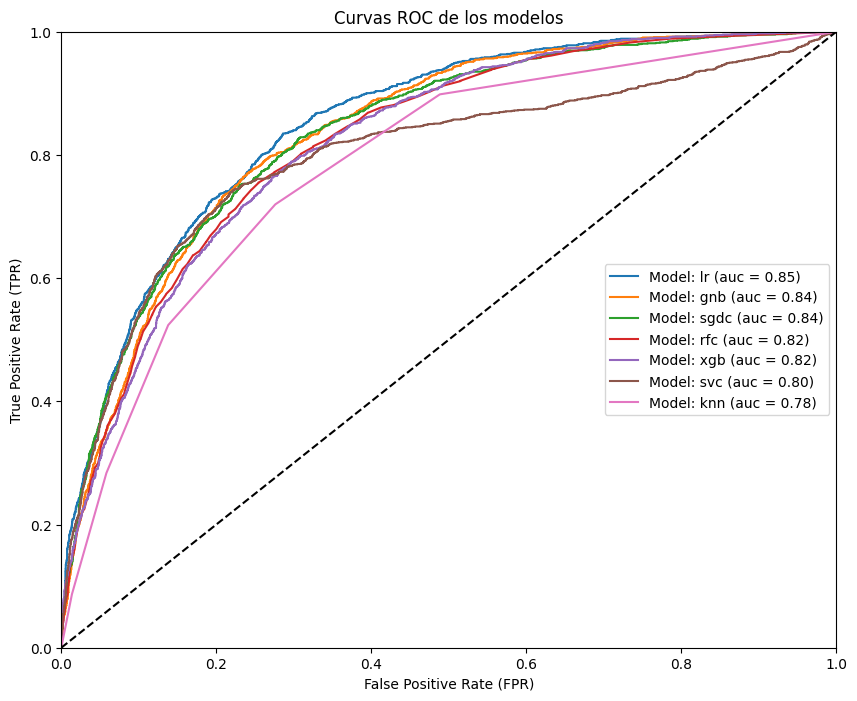

In [ ]:
plot_eval_roc(predictions)

Se visualiza que todos los modelos están por encima de la diagonal de un clasificador aleatorio, por lo que se les podría considerar útiles. Así mismo, la Regresión logística (lr) parece prometedora al tener la mayor área bajo la curva (AUC)

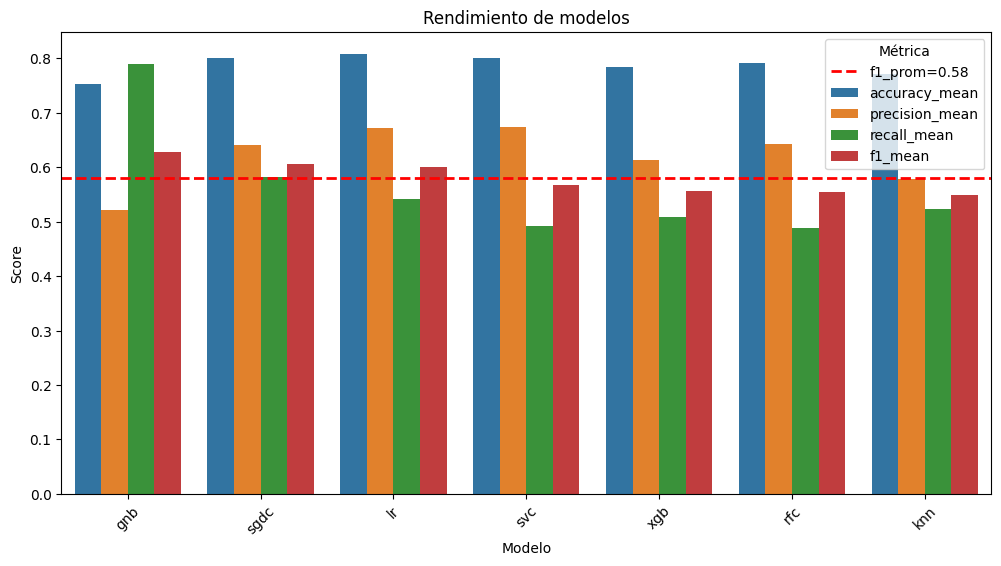

In [ ]:
plot_eval_performance(results)

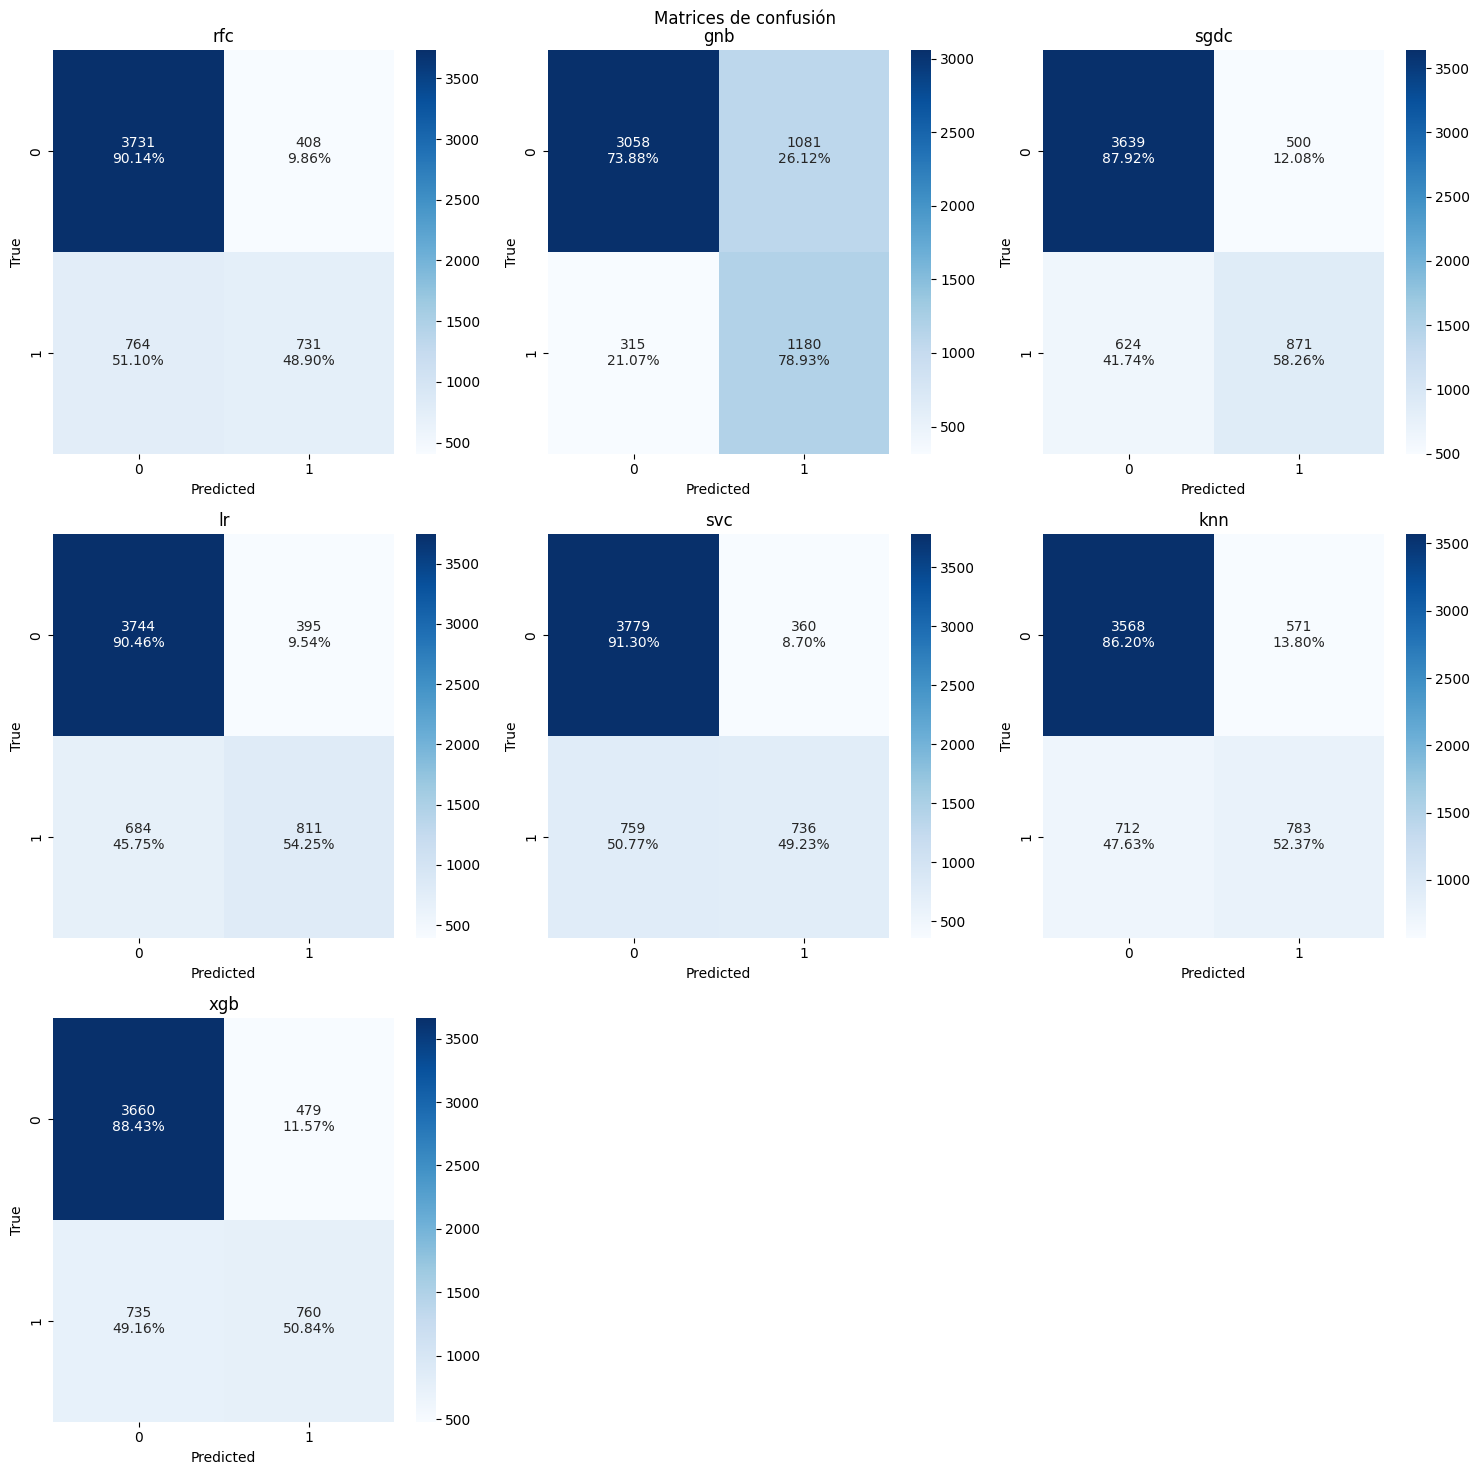

In [ ]:
plot_eval_cm(predictions)

Se puede observar lo siguiente:


*   Los modelos más balanceados son los que están sobre la media del f1 (línea roja punteada). Son el NaiveBayes (gnb), la Gradiente descendente (sgdc) y Regresión logística (lr)
*   El NaiveBayes (gnb) prioriza el recall
*   La Regresión logística prioriza la precisión



## Evaluación de conjunto de entrenamiento balanceado
Se utilizará el conjunto de entrenamiento balanceado para la misma evaluación

In [ ]:
results_bal, predictions_bal = eval_models(estimadores, X_train_bal, y_train_bal)
results_bal.sort_values(by='f1_mean', ascending=False)

,model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,rfc,0.894,0.004,0.854,0.006,0.950,0.007,0.900,0.004
6,xgb,0.861,0.009,0.823,0.010,0.919,0.007,0.868,0.008
4,svc,0.785,0.002,0.759,0.009,0.835,0.016,0.795,0.003
5,knn,0.769,0.009,0.734,0.011,0.845,0.012,0.785,0.008
3,lr,0.773,0.003,0.757,0.007,0.806,0.016,0.781,0.005
2,sgdc,0.764,0.009,0.737,0.021,0.824,0.028,0.778,0.005
1,gnb,0.758,0.005,0.735,0.007,0.807,0.012,0.769,0.005


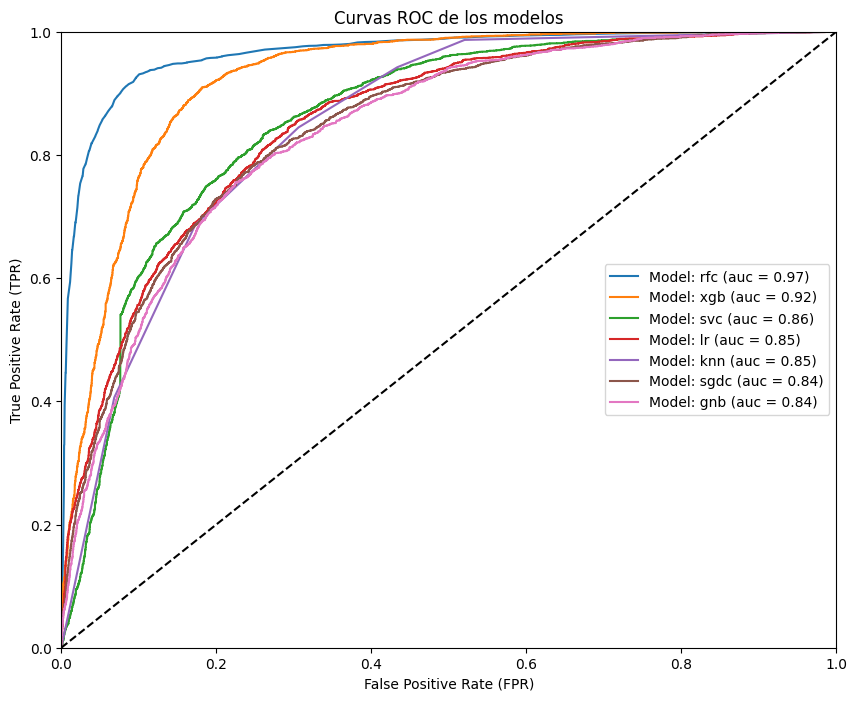

In [ ]:
plot_eval_roc(predictions_bal)

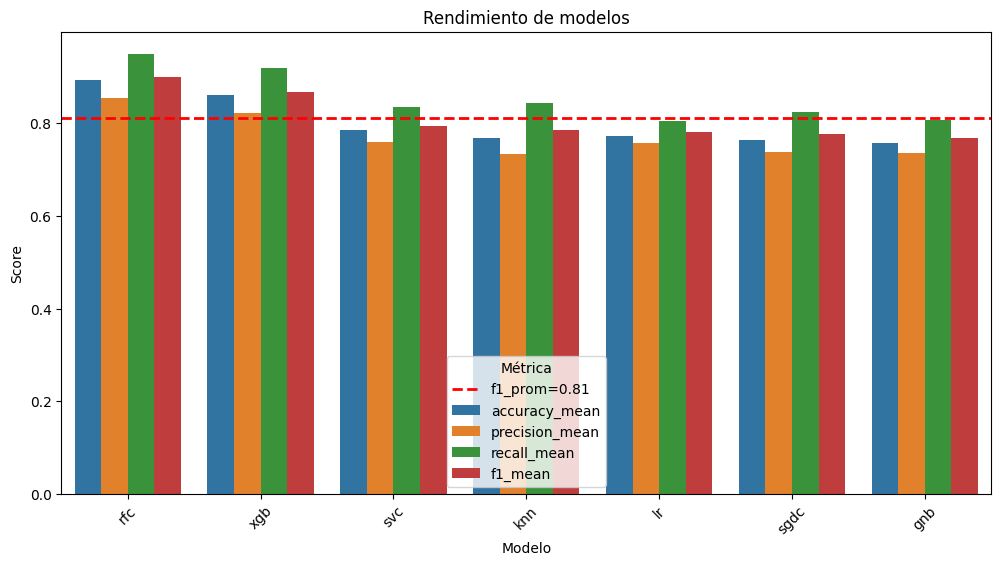

In [ ]:
plot_eval_performance(results_bal)

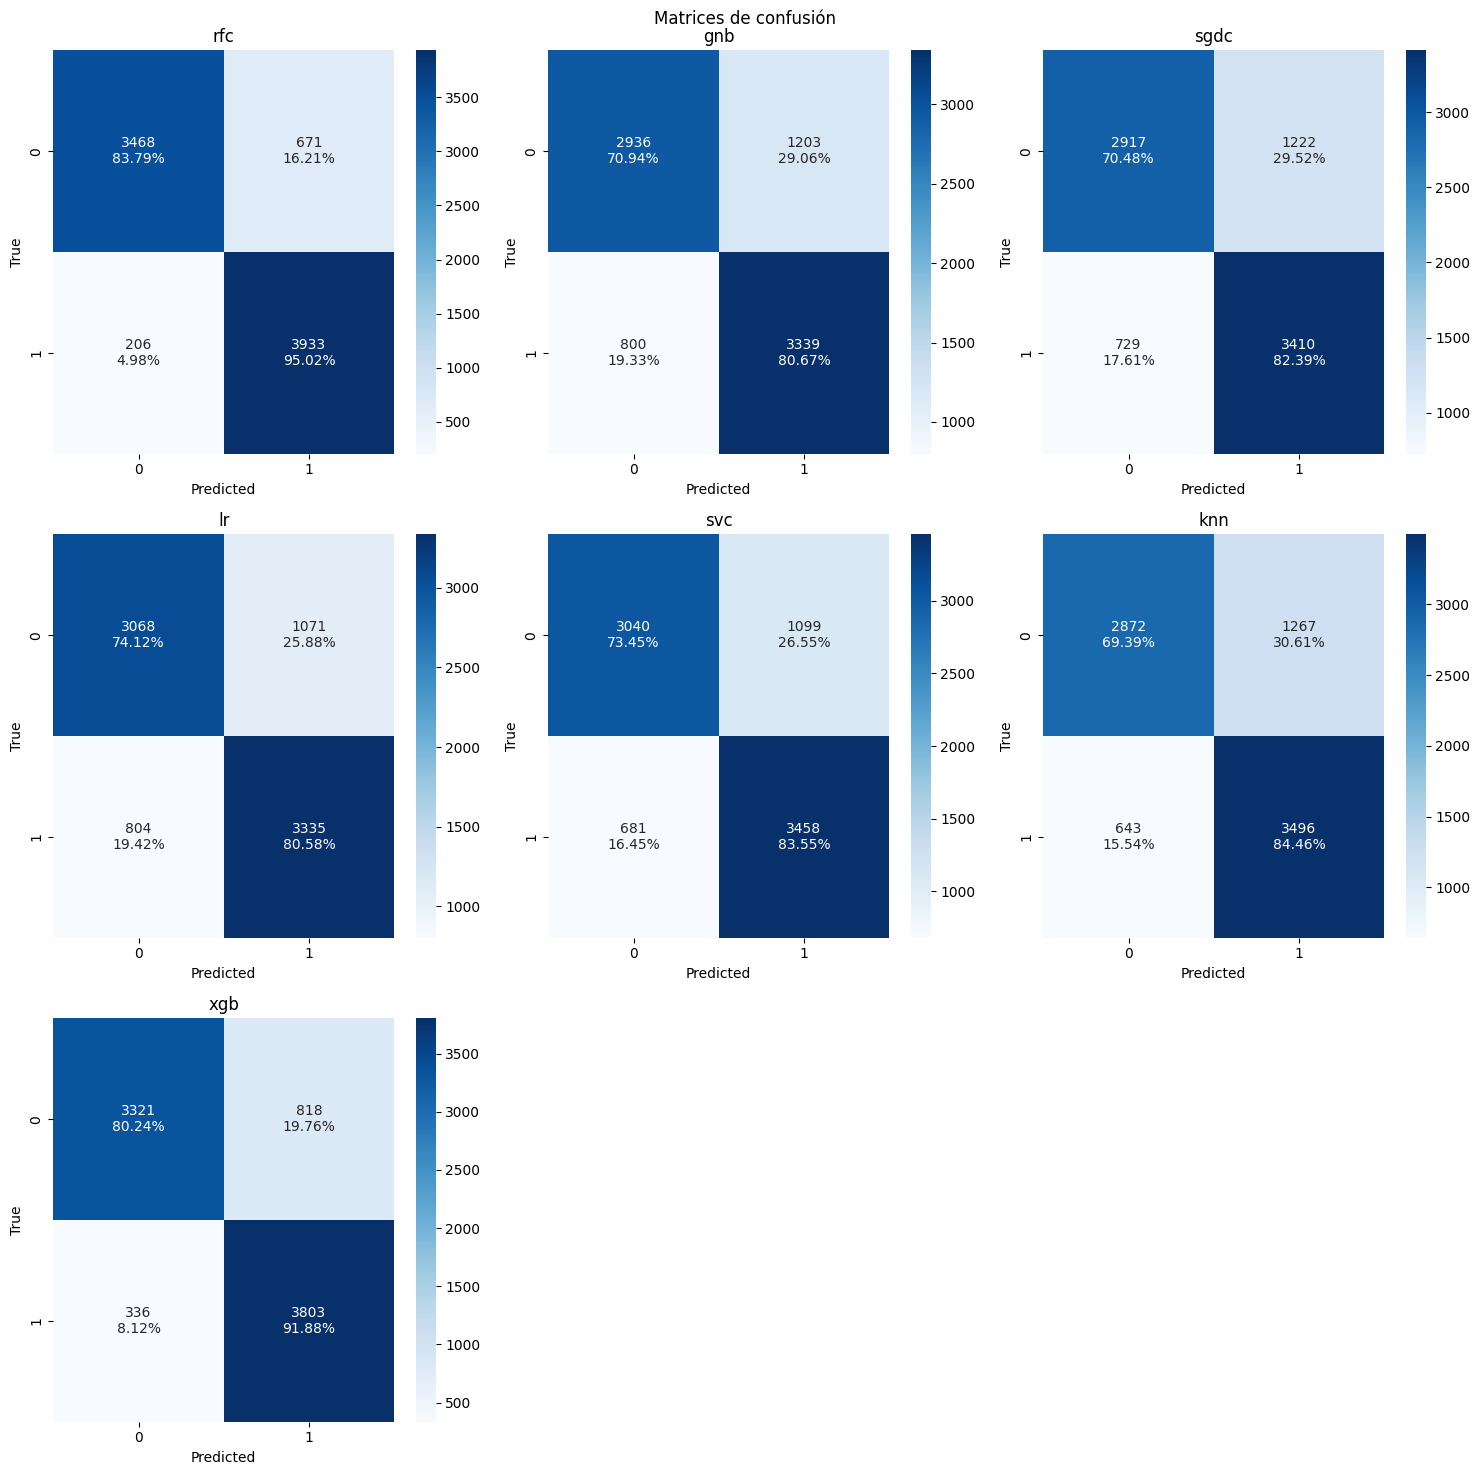

In [ ]:
plot_eval_cm(predictions_bal)

Se visualiza en general una mejora sobre el desempeño de los clasificadores, con un f1 promedio mayor a 80%. No obstante, esto se puede deber a un sobre ajuste, por lo que se comprobará el verdadero desempeño con el conjunto de pruebas (posterior al ajuste)

# Ajuste de hiperparámetros
A continuación, se ejecutará el ajuste de hiperparámetros de los modelos presentados

## Funciones auxiliares
Se definen funciones auxiliares para realizar el grid search de los modelos

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
def grid_search_models(estimators, X, y, cv=5, rank_by='f1'):
  # Recibe un diccionario de modelos y devuelve un df con el score de cada elemento
  scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
  }

  kf = StratifiedKFold(n_splits=cv, shuffle = True, random_state = 42)

  results = pd.DataFrame(columns=['model_name', 'rank', 'params',
    'f1_mean', 'f1_std', 'recall_mean', 'recall_std', 'precision_mean', 'precision_std',
    'accuracy_mean', 'accuracy_std'])

  for nombre, estimator_info in estimators.items():
    estimator = estimator_info['estimator']
    param_grid = estimator_info['param_grid']

    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, cv=kf, n_jobs=-1, refit=rank_by)
    grid_search.fit(X, y)

    # recupera los mejores scores
    best_indices = np.argsort(grid_search.cv_results_[f'mean_test_{rank_by}'])[::-1][:3]

    # agrega los scores en el df de retorno
    for rank, index in enumerate(best_indices, start=1):
      model_results = pd.DataFrame({
        'model_name': [nombre],
        'rank': [rank],
        'params': [grid_search.cv_results_['params'][index]],
        'f1_mean': [grid_search.cv_results_['mean_test_f1'][index]],
        'f1_std': [grid_search.cv_results_['std_test_f1'][index]],
        'recall_mean': [grid_search.cv_results_['mean_test_recall'][index]],
        'recall_std': [grid_search.cv_results_['std_test_recall'][index]],
        'precision_mean': [grid_search.cv_results_['mean_test_precision'][index]],
        'precision_std': [grid_search.cv_results_['std_test_precision'][index]],
        'accuracy_mean': [grid_search.cv_results_['mean_test_accuracy'][index]],
        'accuracy_std': [grid_search.cv_results_['std_test_accuracy'][index]]
      })

      results = pd.concat([results, model_results], ignore_index=True)
    print(f'{nombre} ajustado...')
  return results

In [ ]:
def add_best_params(estimators, params_df):
  # Recibe un diccionario de modelos y el diccionario con sus mejores parámetros respectivos
  for index, row in params_df.iterrows():
    model_name = row['model_name']
    best_params = row['params']

    if model_name in estimators:
      estimators[model_name] = {'estimator': estimators[model_name], 'best_params': best_params}

  return estimators

In [ ]:
def train_eval_models(estimators, X, y, cv=5):
  # Recibe un diccionario de modelos y devuelve un df con el score de cada elemento. También entrena el modelo
  results = pd.DataFrame(columns=['model', 'accuracy_mean', 'accuracy_std',
                                  'precision_mean', 'precision_std', 'recall_mean', 'recall_std',
                                  'f1_mean', 'f1_std'])
  predictions = {}

  kf = StratifiedKFold(n_splits=cv, shuffle = True, random_state = 42)

  for nombre, estimator_info in estimators.items():
    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    fold_y_pred_list = []
    fold_y_test_list = []
    fold_y_scores_list = []

    estimator = estimator_info['estimator'].set_params(**estimator_info['best_params'])

    # calcula los scores por cada fold
    for train_index, test_index in kf.split(X, y):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      estimator.fit(X_train, y_train)

      y_pred = estimator.predict(X_test)
      fold_accuracies.append(accuracy_score(y_test, y_pred))
      fold_precisions.append(precision_score(y_test, y_pred))
      fold_recalls.append(recall_score(y_test, y_pred))
      fold_f1s.append(f1_score(y_test, y_pred))
      fold_y_pred_list.extend(y_pred)
      fold_y_test_list.extend(y_test)

      # calcula el predict_proba por fold
      if hasattr(estimator, 'predict_proba'):
        fold_y_scores_list.extend(estimator.predict_proba(X_test)[:, 1])
      elif hasattr(estimator, 'decision_function'):
        fold_y_scores_list.extend(estimator.decision_function(X_test))

    # entrena el modelo con todos los datos del conjunto
    estimator.fit(X, y)

    # retorna los datos en un dic y un df
    predictions[nombre] = {'model': estimator, 'y_pred': fold_y_pred_list, 'y_true': fold_y_test_list, 'y_scores': fold_y_scores_list}
    model_results = pd.DataFrame({
      'model': [nombre],
      'accuracy_mean': [np.mean(fold_accuracies)],
      'accuracy_std': [np.std(fold_accuracies)],
      'precision_mean': [np.mean(fold_precisions)],
      'precision_std': [np.std(fold_precisions)],
      'recall_mean': [np.mean(fold_recalls)],
      'recall_std': [np.std(fold_recalls)],
      'f1_mean': [np.mean(fold_f1s)],
      'f1_std': [np.std(fold_f1s)]
    })

    results = pd.concat([results, model_results], ignore_index=True)

  return results, predictions

In [ ]:
def test_models(trained_estimators, X, y):
  # recibe los modelos entrenados y los prueba con el conjunto de pruebas
  results = pd.DataFrame(columns=['model', 'accuracy','precision', 'recall', 'f1'])
  predictions = {}

  for nombre, estimator_info in trained_estimators.items():
    estimator = estimator_info['model']
    y_pred = estimator.predict(X)

    if hasattr(estimator, 'predict_proba'):
      y_scores = estimator.predict_proba(X)[:, 1]
    elif hasattr(estimator, 'decision_function'):
      y_scores = estimator.decision_function(X)
    else:
      y_scores = None

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    predictions[nombre] = {'y_pred': y_pred, 'y_true': y, 'y_scores': y_scores}
    model_results = pd.DataFrame({
      'model': [nombre],
      'accuracy': [accuracy],
      'precision': [precision],
      'recall': [recall],
      'f1': [f1]
    })

    results = pd.concat([results, model_results], ignore_index=True)

  return results, predictions

In [ ]:
def plot_test_roc(predictions):
  plt.figure(figsize=(10, 8))

  roc_data = {}
  for model in predictions:
    y_true = predictions[model]['y_true']
    y_scores = predictions[model]['y_scores']
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    roc_data[model] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

  sorted_models = sorted(roc_data, key=lambda x: roc_data[x]['auc'], reverse=True)
  for model in sorted_models:
    fpr = roc_data[model]['fpr']
    tpr = roc_data[model]['tpr']
    auc_value = roc_data[model]['auc']
    plt.plot(fpr, tpr, label=f'Model: {model} (auc = {auc_value:0.2f})')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Curvas ROC de los modelos')
  plt.legend(loc="center right")
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.show()

In [ ]:
def plot_test_performance(df):
    df_sorted = df.sort_values(by='f1', ascending=False)
    df_melted = df_sorted.melt(id_vars='model',
                        value_vars=['accuracy', 'precision', 'recall', 'f1'],
                        var_name='metric', value_name='score')

    f1 = df['f1'].mean()

    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='score', hue='metric', data=df_melted)
    plt.axhline(f1, color='red', label=f'f1_prom={f1:0.2f}', linestyle='dashed', linewidth=2)

    plt.title('Rendimiento de modelos')
    plt.xlabel('Modelo')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Métrica')
    plt.show()

In [ ]:
def plot_test_cm(predictions):
  num_models = len(predictions)
  num_cols = 3
  num_rows = math.ceil(num_models / num_cols)

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

  if num_rows == 1:
    axes = [axes]  # Convertir en lista si solo hay una fila

  for i, (model, data) in enumerate(predictions.items()):
    ax = axes[i // num_cols][i % num_cols]
    cm = confusion_matrix(data['y_true'], data['y_pred'])
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalizar

    percentages = ["{0:.2%}".format(value) for value in cm_normalized.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(cm.flatten(), percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)

    ax.set_title(f'{model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

  for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols][j % num_cols])

  fig.suptitle('Matrices de confusión')
  plt.tight_layout()
  plt.show()

## Instanciamiento de modelos
A continuación, se instancian los modelos a evaluar, así como sus parámetros para el Grid Search

In [ ]:
rfc_t = RandomForestClassifier(random_state=42)
param_grid_rfc = {
  'n_estimators': [100,200,300],
  'max_depth': [None,10,25],
  'criterion': ['gini','entropy'],
  'class_weight': [None, 'balanced']
}

gnb_t = GaussianNB()
param_grid_gnb = {
  'var_smoothing': np.logspace(0, -9, num=100)
}

sgdc_t = SGDClassifier(random_state=42)
param_grid_sgdc = {
  'loss': ['hinge', 'log_loss', 'modified_huber'],
  'alpha': [0.0001, 0.001, 0.01],
  'penalty': ['l2', 'l1', 'elasticnet'],
  'class_weight': [None, 'balanced']
}

lr_t = LogisticRegression(random_state=42)
param_grid_lr = {
  'C': np.logspace(-4, 4, 20),
  'penalty': ['l2','l1'],
  'solver': ['liblinear'], #, 'lbfgs'
  'class_weight': [None, 'balanced'],
  'max_iter': [500]
}

svc_t = SVC(random_state=42)
param_grid_svc = {
  'C': [0.1, 1, 100],
  'gamma': [1, 0.1, 0.01, 0.001],
  'kernel': ['linear','rbf','sigmoid'],
  'class_weight': [None, 'balanced']
}

knn_t = KNeighborsClassifier()
param_grid_knn = {
  'n_neighbors': range(5,36,5),
  'p': [1.0,2.0,3.0],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan', 'minkowski']
}

xgb_t = XGBClassifier(random_state=42)

param_grid_xgb = {
  'n_estimators': [100, 200, 300],
  'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3, 4, 5],
  'subsample': [0.5, 0.7, 1.0],
  'colsample_bytree': [0.5, 0.7, 1.0]
}

estimadores = {
  'gnb': {'estimator': gnb_t, 'param_grid': param_grid_gnb},
  'sgdc': {'estimator': sgdc_t, 'param_grid': param_grid_sgdc},
  'lr': {'estimator': lr_t, 'param_grid': param_grid_lr},
  'knn': {'estimator': knn_t, 'param_grid': param_grid_knn},
  'xgb': {'estimator': xgb_t, 'param_grid': param_grid_xgb},
  'rfc': {'estimator': rfc_t, 'param_grid': param_grid_rfc},
  'svc': {'estimator': svc_t, 'param_grid': param_grid_svc}
}

## Grid Search
Se ejecuta el Grid Search en los conjuntos de enternamiento. La función retorna las 3 mejores combinaciones por cada modelo evaluado. El Grid Search se configura para maximizar el score F1

In [ ]:
#results = grid_search_models(estimadores, X_train, y_train, rank_by='f1')
# ojo que demora aprox 1h en clcular

# Como el grid search demora mucho, se guardaron los resultados en un archivo de texto para no tener que volverlo a ejecutar
results = pd.read_csv('grid_search-1.csv')
results['params'] = results['params'].apply(ast.literal_eval)

In [ ]:
#results.to_csv('grid_search-1.csv', index=False)

In [ ]:
results

,model_name,rank,params,f1_mean,f1_std,recall_mean,recall_std,precision_mean,precision_std,accuracy_mean,accuracy_std
0,gnb,1,{'var_smoothing': 0.533669923120631},0.639,0.018,0.761,0.017,0.550,0.019,0.771,0.013
1,gnb,2,{'var_smoothing': 0.657933224657568},0.635,0.026,0.732,0.026,0.560,0.026,0.776,0.017
2,gnb,3,{'var_smoothing': 0.8111308307896871},0.634,0.030,0.696,0.031,0.582,0.032,0.786,0.019
3,sgdc,1,"{'alpha': 0.01, 'class_weight': 'balanced', 'l...",0.637,0.018,0.805,0.023,0.527,0.020,0.756,0.015
4,sgdc,2,"{'alpha': 0.01, 'class_weight': 'balanced', 'l...",0.634,0.019,0.797,0.023,0.527,0.017,0.756,0.013
5,sgdc,3,"{'alpha': 0.01, 'class_weight': 'balanced', 'l...",0.634,0.022,0.821,0.014,0.517,0.029,0.747,0.025
6,lr,1,"{'C': 4.281332398719396, 'class_weight': 'bala...",0.636,0.019,0.807,0.030,0.526,0.015,0.755,0.012
7,lr,2,"{'C': 0.012742749857031334, 'class_weight': 'b...",0.636,0.018,0.799,0.026,0.529,0.016,0.758,0.012
8,lr,3,"{'C': 0.004832930238571752, 'class_weight': 'b...",0.636,0.018,0.807,0.023,0.525,0.016,0.755,0.013
9,knn,1,"{'metric': 'euclidean', 'n_neighbors': 35, 'p'...",0.602,0.018,0.566,0.021,0.644,0.026,0.801,0.010


Se realiza lo mismo para el conjunto balanceado

In [ ]:
#results_bal = grid_search_models(estimadores, X_train_bal, y_train_bal, rank_by='f1')
# ojo que demora 3h aprox

# Como el grid search demora mucho, se guardaron los resultados en un archivo de texto para no tener que volverlo a ejecutar
results_bal = pd.read_csv('grid_search_bal-1.csv')
results_bal['params'] = results_bal['params'].apply(ast.literal_eval)

In [ ]:
#results_bal.to_csv('grid_search_bal-1.csv', index=False)

In [ ]:
results_bal

,model_name,rank,params,f1_mean,f1_std,recall_mean,recall_std,precision_mean,precision_std,accuracy_mean,accuracy_std
0,gnb,1,{'var_smoothing': 0.15199110829529336},0.781,0.008,0.876,0.014,0.705,0.008,0.754,0.008
1,gnb,2,{'var_smoothing': 0.0533669923120631},0.781,0.006,0.849,0.013,0.723,0.008,0.762,0.006
2,gnb,3,{'var_smoothing': 0.1873817422860384},0.781,0.008,0.881,0.015,0.701,0.009,0.752,0.009
3,sgdc,1,"{'alpha': 0.01, 'class_weight': 'balanced', 'l...",0.779,0.003,0.814,0.011,0.748,0.007,0.770,0.003
4,sgdc,2,"{'alpha': 0.01, 'class_weight': None, 'loss': ...",0.779,0.003,0.814,0.011,0.748,0.007,0.770,0.003
5,sgdc,3,"{'alpha': 0.01, 'class_weight': 'balanced', 'l...",0.779,0.007,0.804,0.022,0.756,0.008,0.772,0.003
6,lr,1,"{'C': 0.615848211066026, 'class_weight': 'bala...",0.782,0.004,0.807,0.016,0.758,0.008,0.775,0.002
7,lr,2,"{'C': 0.615848211066026, 'class_weight': None,...",0.782,0.004,0.807,0.016,0.758,0.008,0.775,0.002
8,lr,3,"{'C': 0.23357214690901212, 'class_weight': Non...",0.781,0.004,0.806,0.016,0.759,0.008,0.775,0.003
9,knn,1,"{'metric': 'minkowski', 'n_neighbors': 10, 'p'...",0.857,0.007,0.966,0.003,0.771,0.011,0.839,0.010


### Entrenamiento de modelos
A continuación, se entrenarán los modelos con sus mejores parámetros

Se recuperan los mejores parámetros por cada modelo

In [ ]:
import ast
best_params_df = results[results['rank'] == 1]
best_params_bal_df = results_bal[results_bal['rank'] == 1]

### Entrenamiento
A continuación se entrenan los modelos ajustados con el conjunto de entrenamiento

In [ ]:
rfc = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
sgdc = SGDClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)

estimadores = {
    'rfc': rfc,
    'gnb': gnb,
    'sgdc': sgdc,
    'lr': lr,
    'svc': svc,
    'knn': knn,
    'xgb': xgb
}

estimadores = add_best_params(estimadores, best_params_df)
results, predictions = train_eval_models(estimadores, X_train, y_train)
#estimadores

### Entrenamiento con conjunto de entrenamiento balanceado
A continuación se entrenan los modelos ajustados con el conjunto de datos con balance

In [ ]:
rfc_bal = RandomForestClassifier(random_state=42)
gnb_bal = GaussianNB()
sgdc_bal = SGDClassifier(random_state=42)
lr_bal = LogisticRegression(random_state=42)
svc_bal = SVC(random_state=42)
knn_bal = KNeighborsClassifier()
xgb_bal = XGBClassifier(random_state=42)

estimadores_bal = {
    'rfc': rfc_bal,
    'gnb': gnb_bal,
    'sgdc': sgdc_bal,
    'lr': lr_bal,
    'svc': svc_bal,
    'knn': knn_bal,
    'xgb': xgb_bal
}

estimadores_bal = add_best_params(estimadores_bal, best_params_bal_df)
results_bal, predictions_bal = train_eval_models(estimadores_bal, X_train_bal, y_train_bal)

## Evaluación de modelos
A continuación, se evaluarán los mejores modelos ajustados seleccionados

### Evaluación de modelos entrenados
Se evaluarán los modelos entrenados

In [ ]:
results.sort_values(by='f1_mean', ascending=False)

,model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
1,gnb,0.771,0.013,0.550,0.019,0.761,0.017,0.639,0.018
0,rfc,0.781,0.013,0.568,0.020,0.726,0.032,0.638,0.022
2,sgdc,0.756,0.015,0.527,0.020,0.805,0.023,0.637,0.018
3,lr,0.755,0.012,0.526,0.015,0.807,0.030,0.636,0.019
4,svc,0.747,0.009,0.516,0.011,0.795,0.033,0.625,0.016
5,knn,0.801,0.010,0.644,0.026,0.566,0.021,0.602,0.018
6,xgb,0.807,0.011,0.670,0.031,0.539,0.024,0.597,0.023


In [ ]:
results_tuning = results.sort_values(by='f1_mean', ascending=False)
# guardamos el df para compararlo después

In [ ]:
mostrar_df_estilizado(results_tuning[['model','accuracy_mean','precision_mean','recall_mean','f1_mean']])

model,accuracy_mean,precision_mean,recall_mean,f1_mean
gnb,0.771,0.550,0.761,0.639
rfc,0.781,0.568,0.726,0.638
sgdc,0.756,0.527,0.805,0.637
lr,0.755,0.526,0.807,0.636
svc,0.747,0.516,0.795,0.625
knn,0.801,0.644,0.566,0.602
xgb,0.807,0.670,0.539,0.597


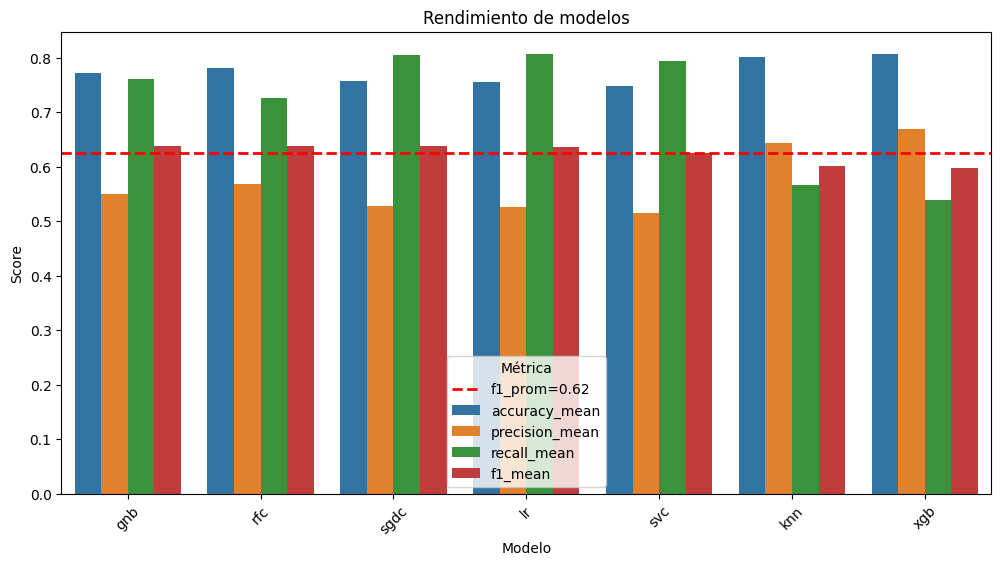

In [ ]:
plot_eval_performance(results)

*   Se visualiza que el Naive Bayes sigue teniendo el mejor score F1
*   El Random Forest subió al segundo lugar y mejoró su score F1 más de 8%
*   El promedio de score F1 subió 4%


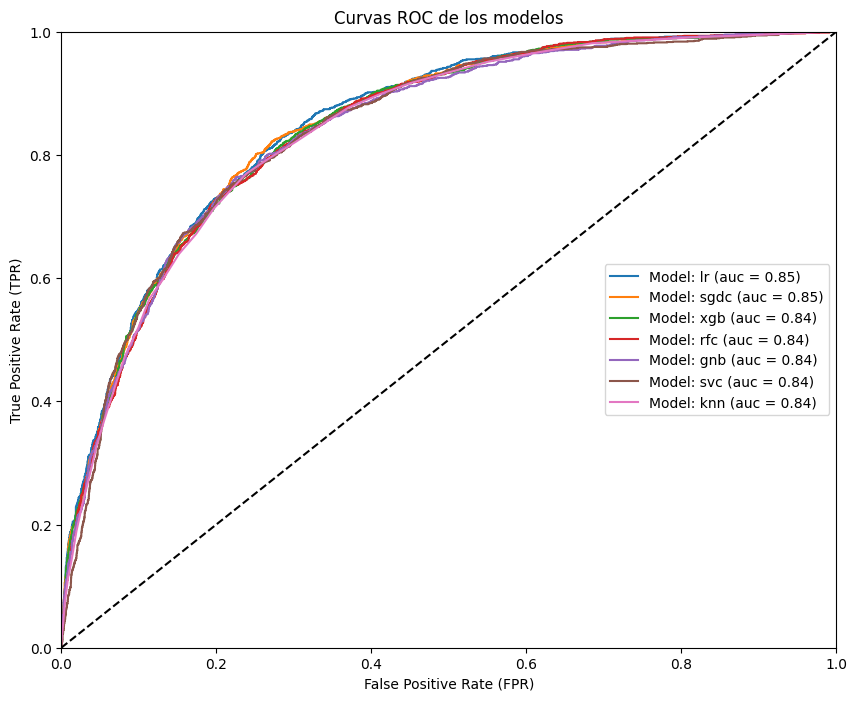

In [ ]:
plot_eval_roc(predictions)

La curvas se han ajustado y el área bajo la curva es casi el mismo para todos los modelos

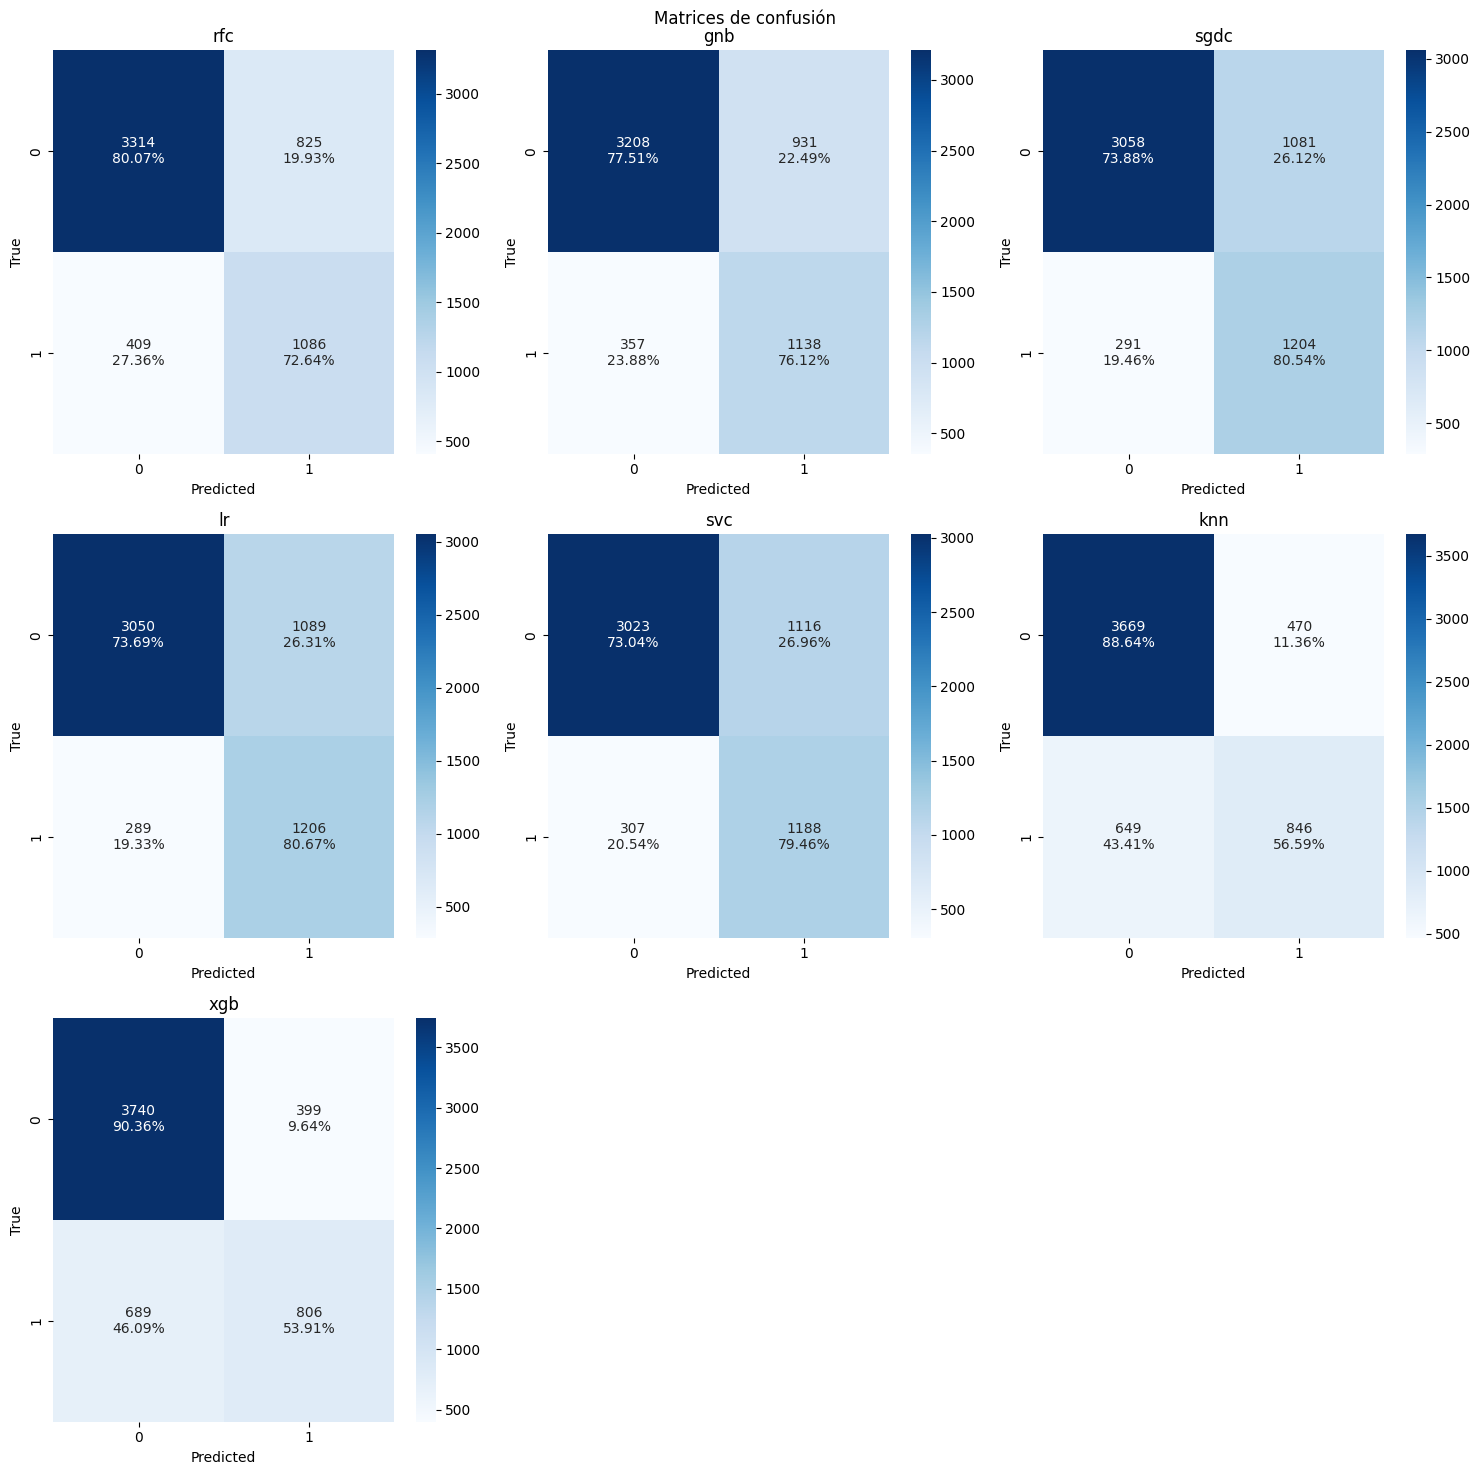

In [ ]:
plot_eval_cm(predictions)

### Evaluación de modelos entrenados con balance
A continuación, se evaluarán los modelos entrenados con un conjunto de entrenamiento balanceado

In [ ]:
results_bal.sort_values(by='f1_mean', ascending=False)

,model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,rfc,0.897,0.004,0.856,0.006,0.954,0.008,0.902,0.003
4,svc,0.888,0.006,0.867,0.009,0.918,0.011,0.892,0.006
6,xgb,0.864,0.005,0.825,0.007,0.924,0.006,0.872,0.005
5,knn,0.839,0.010,0.771,0.011,0.966,0.003,0.857,0.007
3,lr,0.775,0.002,0.758,0.008,0.807,0.016,0.782,0.004
1,gnb,0.754,0.008,0.705,0.008,0.876,0.014,0.781,0.008
2,sgdc,0.770,0.003,0.748,0.007,0.814,0.011,0.779,0.003


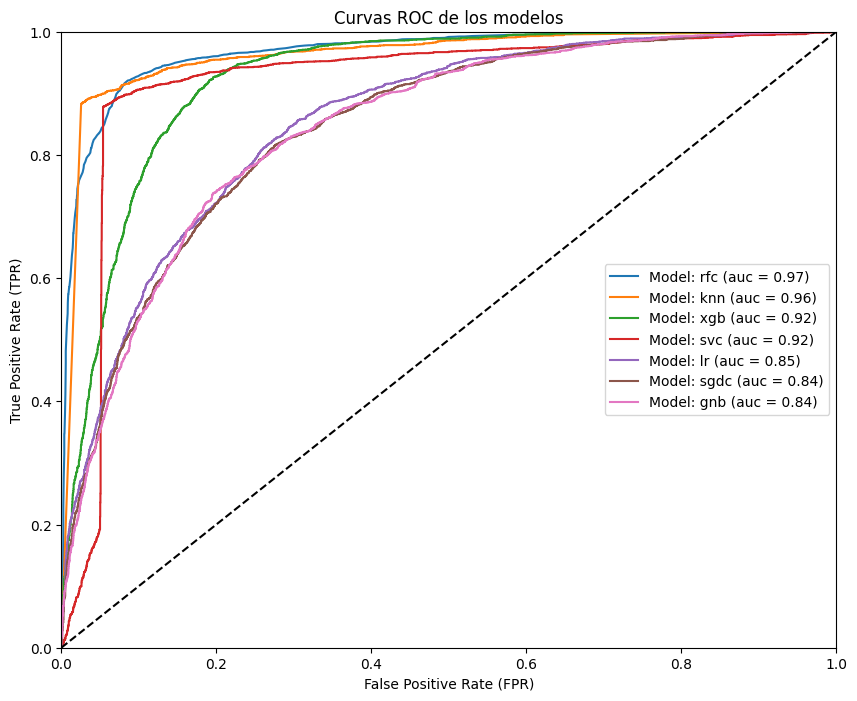

In [ ]:
plot_eval_roc(predictions_bal)

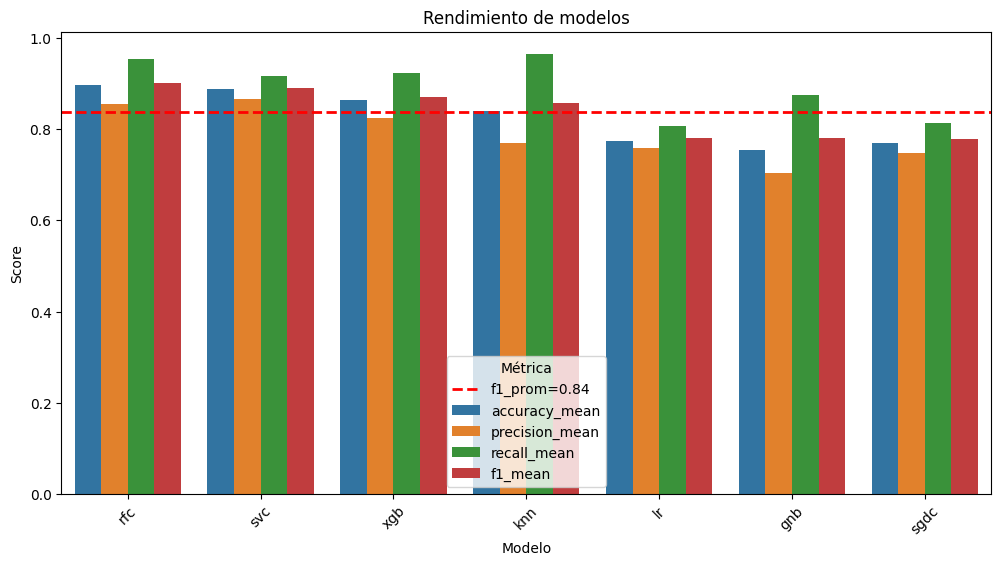

In [ ]:
plot_eval_performance(results_bal)

El conjunto balanceado también mejoró un 3% en su score f1 promedio

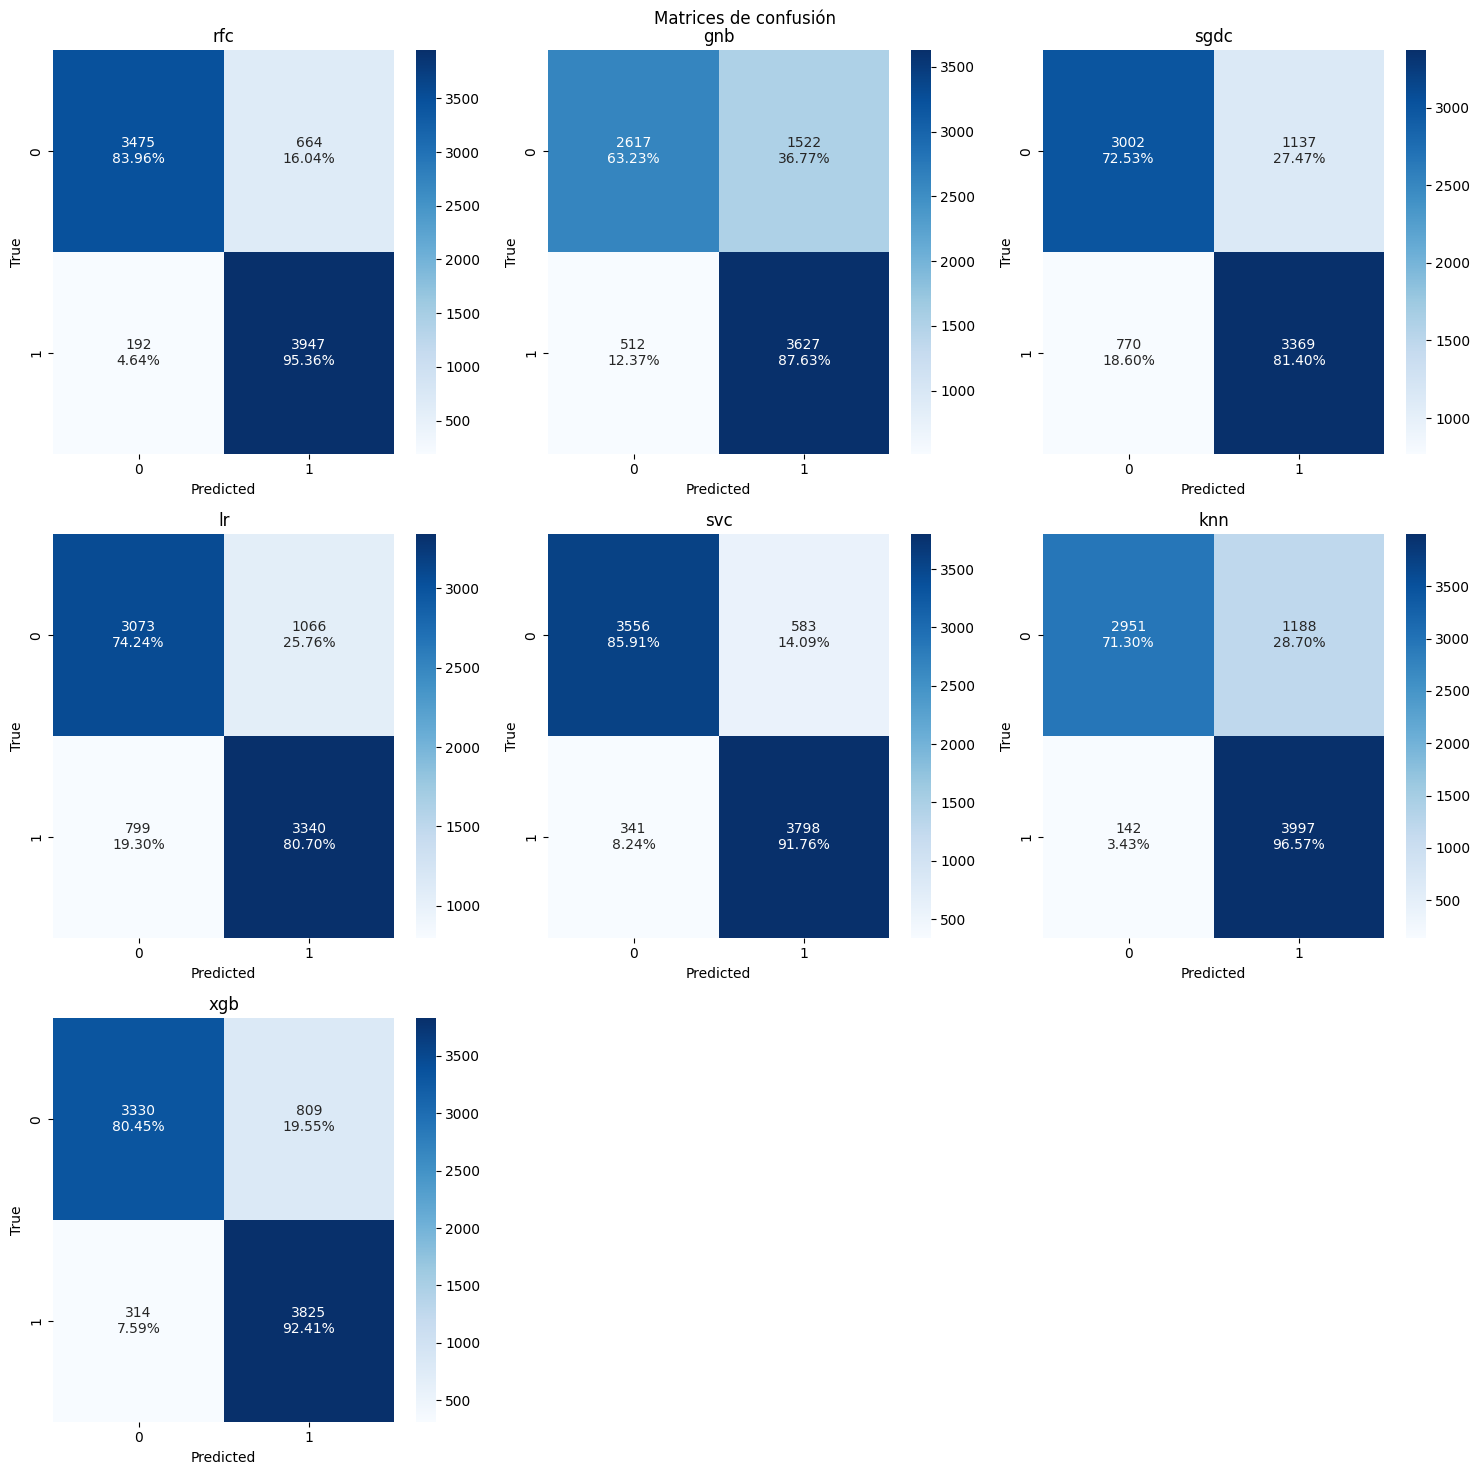

In [ ]:
plot_eval_cm(predictions_bal)

Se visualiza que continua el buen desempeño en todos los modelos. Confirmaremos si hay sobreajuste con la prueba con el conjunto de pruebas

# Prueba de modelos
A continuación, se probarán los modelos seleccionados y ajustados con el conjunto de datos de prueba

## Prueba de los modelos entrenados

In [ ]:
results_test, predictions_test = test_models(predictions, X_test, y_test)

In [ ]:
results_test = results_test.sort_values(by='f1', ascending=False)

Se visualiza lo siguiente:


*   El XGBoost y el KNN priorizan la precisión y el accuracy
*   El resto de modelos están más balanceados por su score F1 más alto
*   El mejor tradeoff del balance con el recall lo tiene la Gradiente descendente



In [ ]:
mostrar_df_estilizado(results_test)

model,accuracy,precision,recall,f1
rfc,0.769,0.549,0.735,0.629
sgdc,0.750,0.519,0.794,0.628
gnb,0.756,0.528,0.759,0.623
svc,0.749,0.518,0.781,0.623
lr,0.737,0.503,0.797,0.617
knn,0.800,0.635,0.580,0.606
xgb,0.796,0.639,0.529,0.579


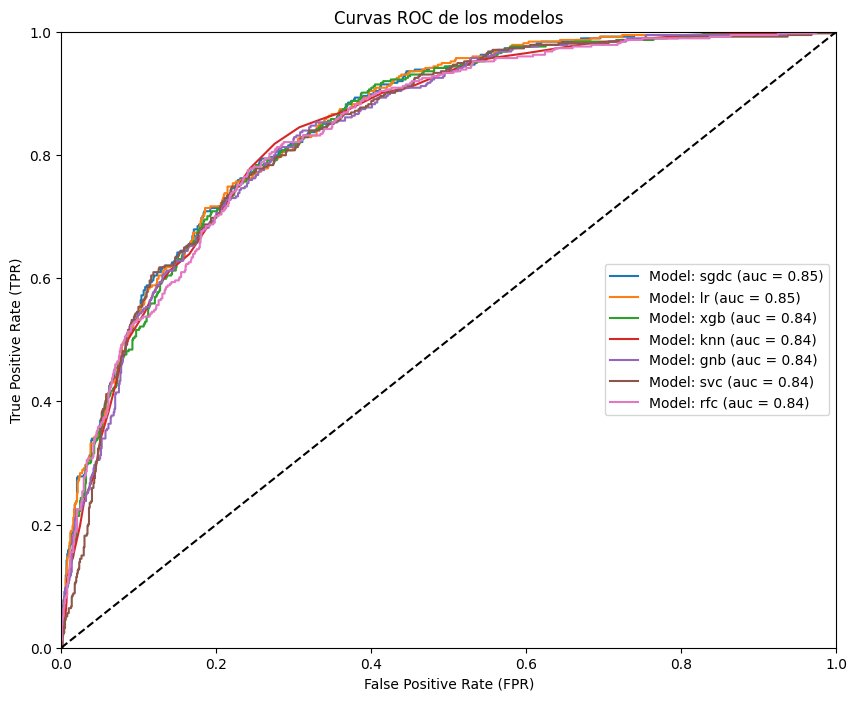

In [ ]:
plot_test_roc(predictions_test)

Las curvas siguen ajustadas y se ha mantenido el área bajo la curva. Parece que el modelo ha respondido bien a este modelo de pruebas y no ha disminuido sus indicadores

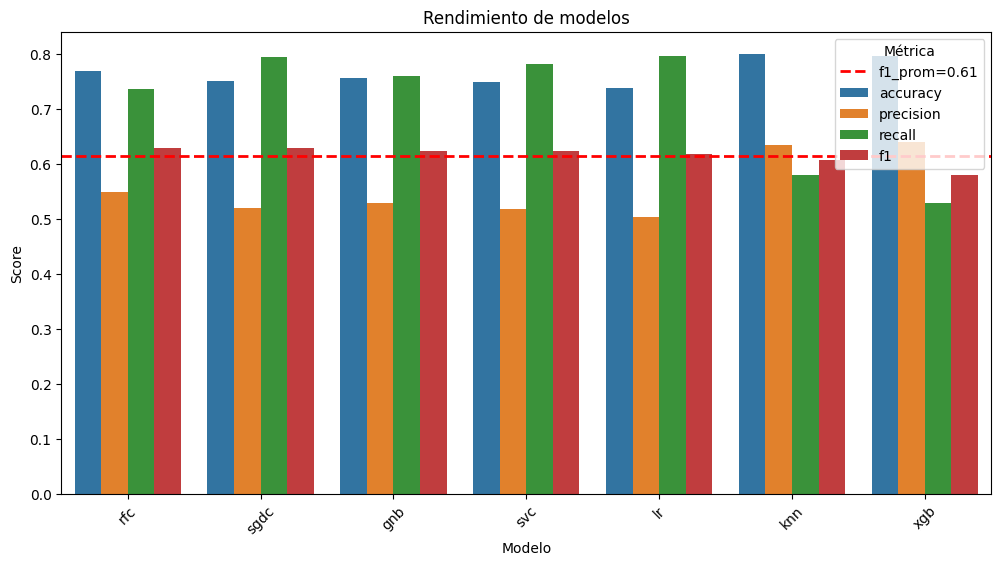

In [ ]:
plot_test_performance(results_test)

El score F1 promedio disminuyó solo un 1%

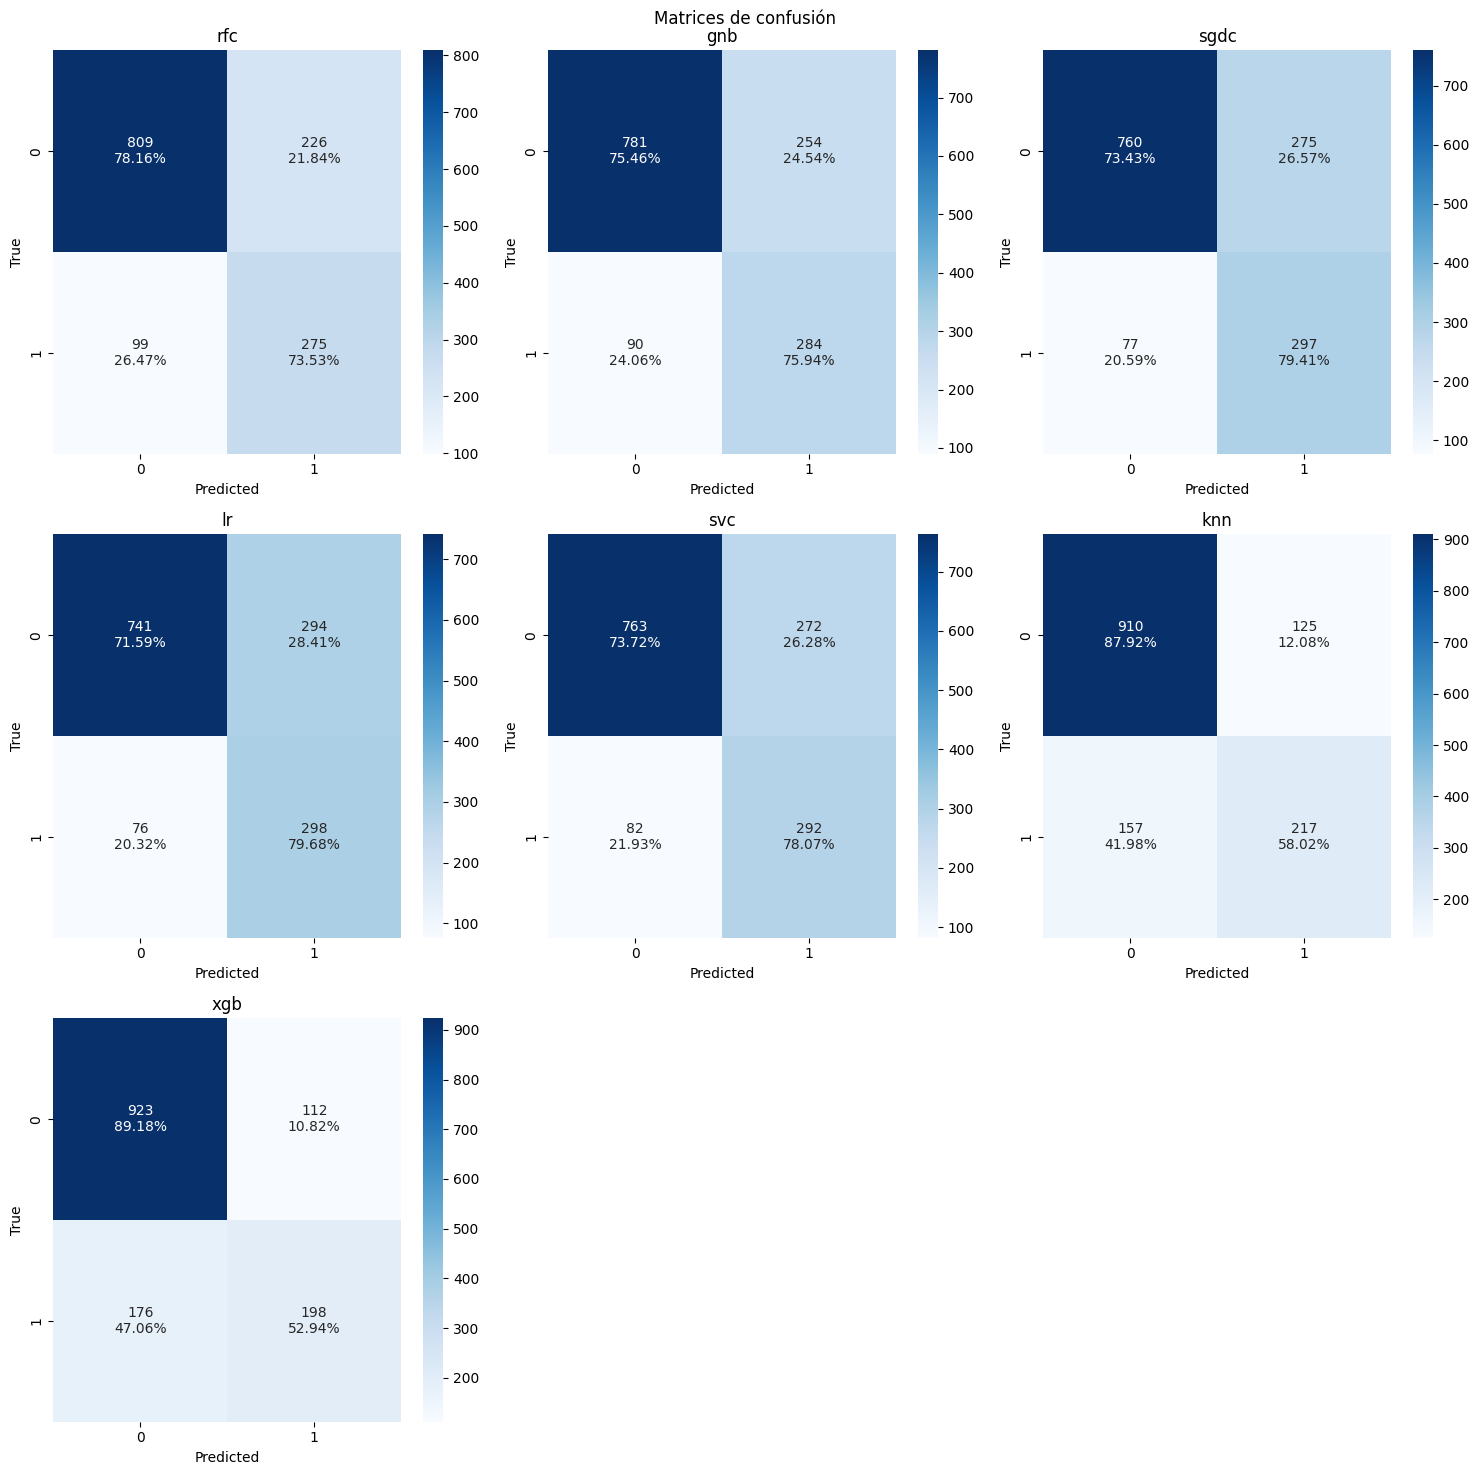

In [ ]:
plot_test_cm(predictions_test)

## Prueba de los modelos entrenados con balance

In [ ]:
results_test_bal, predictions_test_bal = test_models(predictions_bal, X_test, y_test)

In [ ]:
results_test_bal.sort_values(by='f1', ascending=False)

,model,accuracy,precision,recall,f1
3,lr,0.742,0.509,0.794,0.621
2,sgdc,0.735,0.500,0.802,0.616
6,xgb,0.769,0.556,0.652,0.600
1,gnb,0.693,0.459,0.866,0.600
0,rfc,0.771,0.567,0.586,0.576
5,knn,0.720,0.482,0.706,0.573
4,svc,0.752,0.540,0.430,0.479


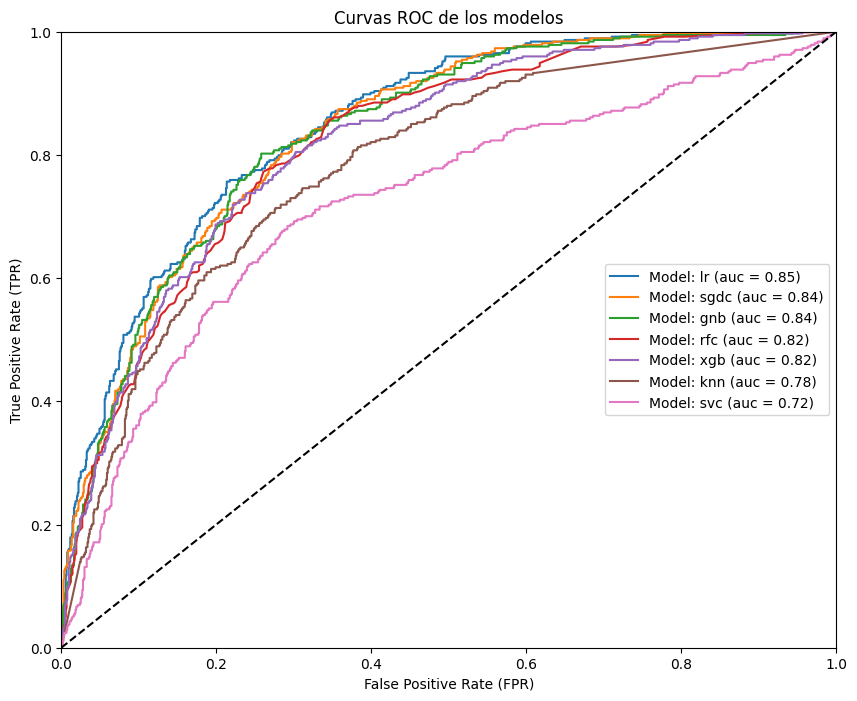

In [ ]:
plot_test_roc(predictions_test_bal)

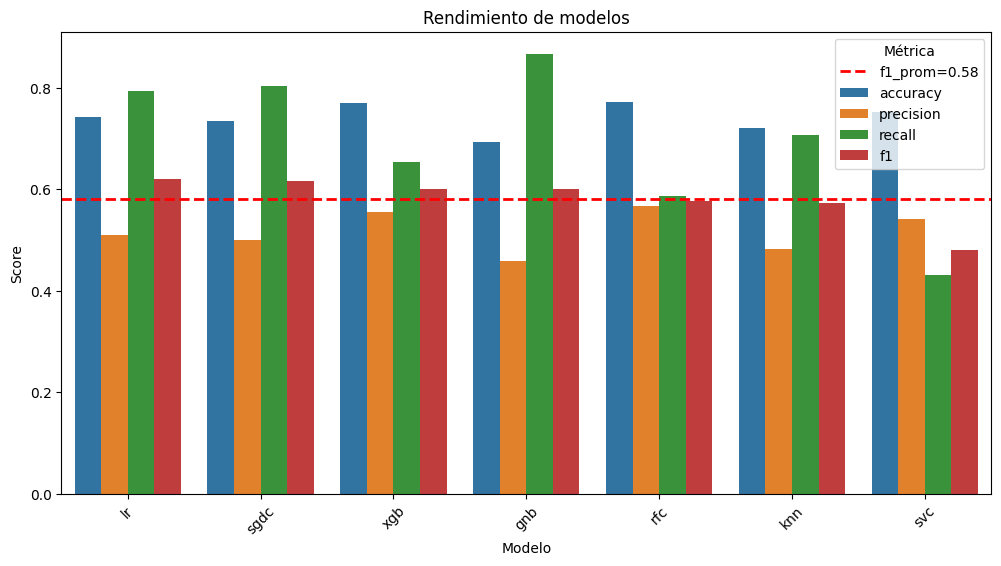

In [ ]:
plot_test_performance(results_test_bal)

Se visualiza que, en efecto, los modelos entrenados con el conjunto de datos balanceado estaba sobreajustado y no generalizó bien con el conjunto de datos de prueba. El score F1 promedio disminuyó 26%

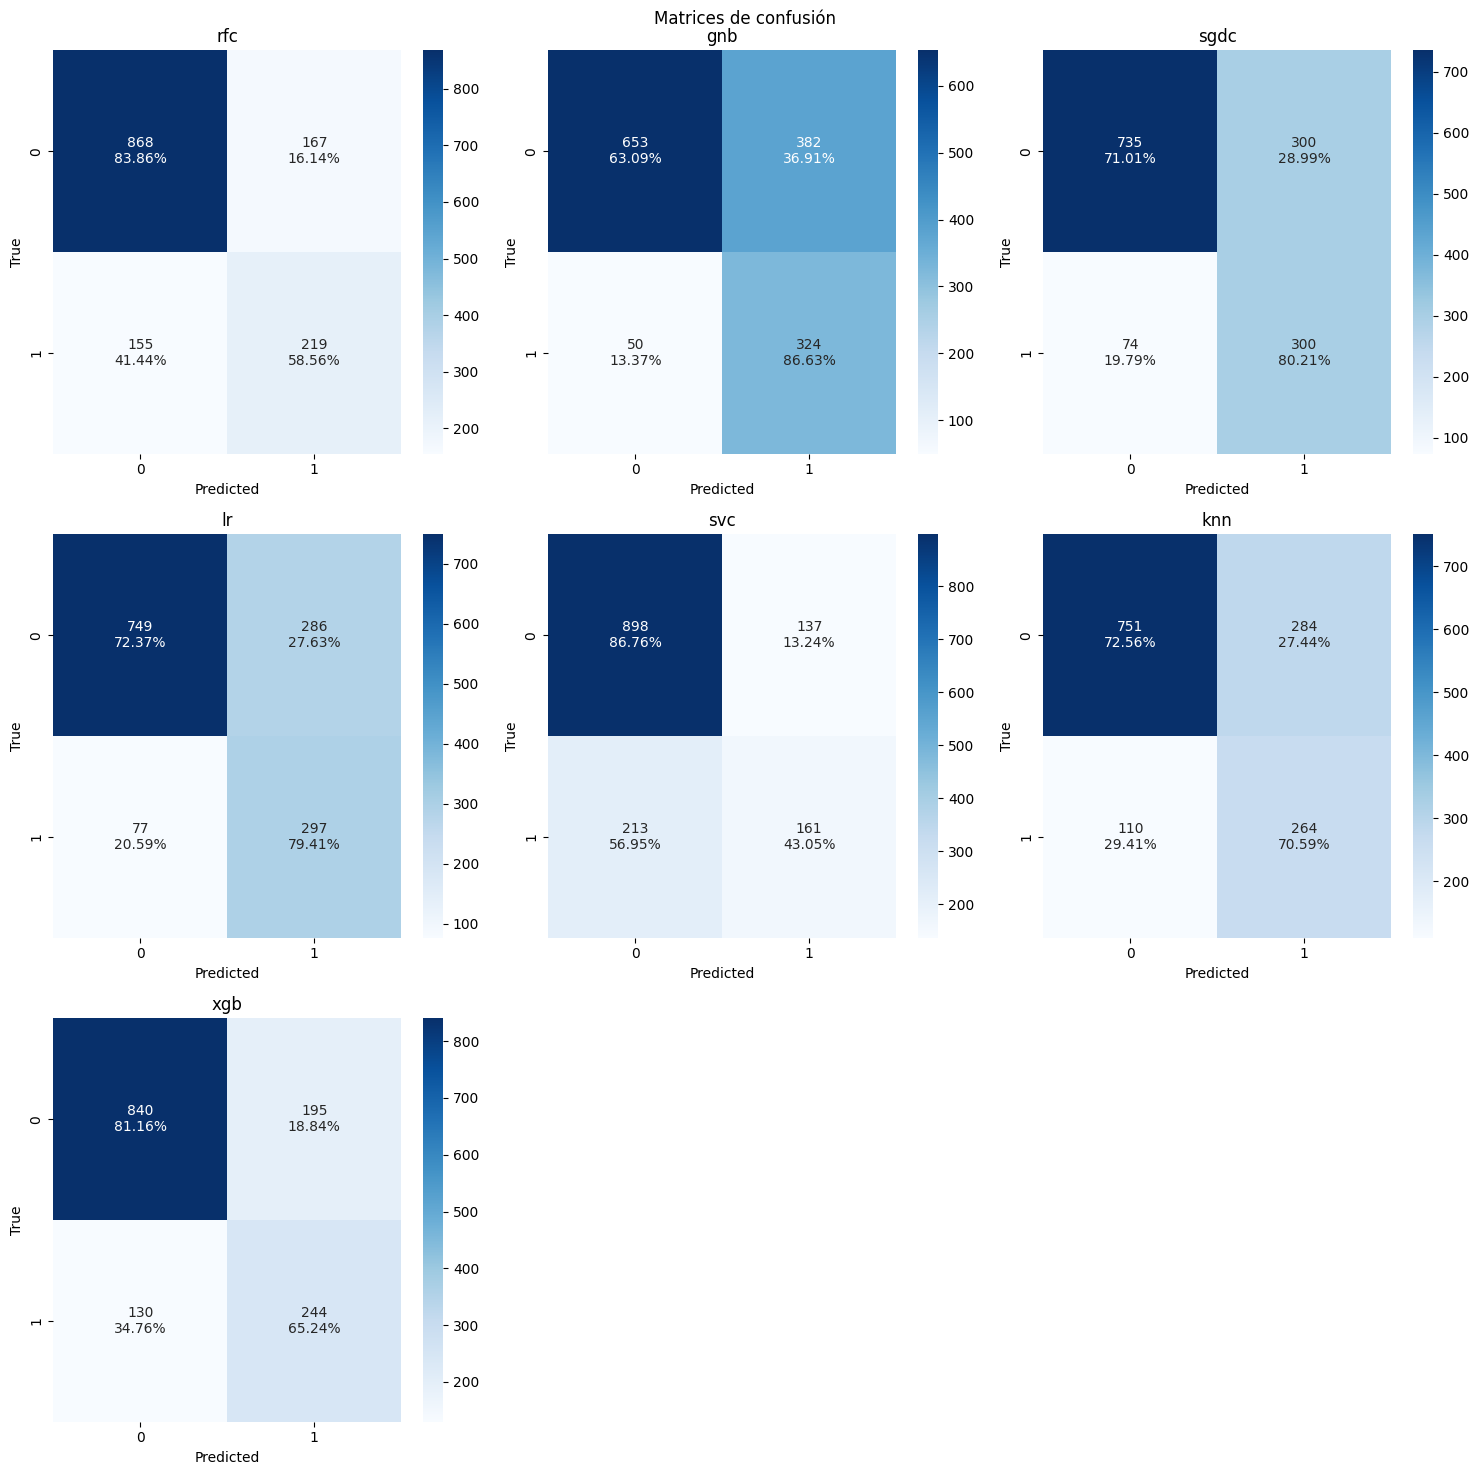

In [ ]:
plot_test_cm(predictions_test_bal)

# Importancia de las características
Obtenemos la importancia de las características en los modelo que lo permitan

In [ ]:
def importancia_caracteristicas(trained_estimators, feature_names):
    feature_importances = {nombre: estimator_info['model'].feature_importances_ if hasattr(estimator_info['model'], 'feature_importances_')
                           else estimator_info['model'].coef_[0] if hasattr(estimator_info['model'], 'coef_')
                           else [None] * len(feature_names)
                           for nombre, estimator_info in trained_estimators.items()}

    df_feature_importances = pd.DataFrame(feature_importances, index=feature_names)

    return df_feature_importances

In [ ]:
def plot_importancia_caracteristicas(importancia_df):
    num_models = importancia_df.shape[1]
    plt.figure(figsize=(15, 5 * num_models))

    for i, model in enumerate(importancia_df.columns):
        plt.subplot(num_models, 1, i + 1)
        sns.barplot(x=importancia_df[model].sort_values(ascending=False), y=importancia_df[model].sort_values(ascending=False).index)
        plt.title(f'Importancia de características {model}')
        plt.xlabel('Importancia')
        plt.ylabel('Característica')

    plt.suptitle('Importancia de características', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

Obtenemos el dataframe con la importancia de los atributos

In [ ]:
importancia_df = importancia_caracteristicas(predictions, X_train.columns)
importancia_df.head()

,rfc,gnb,sgdc,lr,svc,knn,xgb
gender,0.016,None,0.008,0.029,None,None,0.007
SeniorCitizen,0.012,None,0.064,0.153,None,None,0.007
Partner,0.015,None,0.029,0.055,None,None,0.004
Dependents,0.015,None,-0.076,-0.205,None,None,0.007
PhoneService,0.005,None,-0.115,0.465,None,None,0.010


In [ ]:
models_available = importancia_df.select_dtypes(include=['float64','float32']).columns.to_list()
importancia_df = importancia_df[models_available]
importancia_df.T

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_FiberOptic,InternetService_No,Contract_Monthtomonth,Contract_OneYear,Contract_TwoYear,PaymentMethod_BankTransferAutomatic,PaymentMethod_CreditCardAutomatic,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,tenure,MonthlyCharges,TotalChargesLog
rfc,0.016,0.012,0.015,0.015,0.005,0.014,0.021,0.014,0.011,0.018,0.014,0.016,0.022,0.018,0.058,0.035,0.127,0.020,0.070,0.011,0.010,0.036,0.009,0.149,0.123,0.140
sgdc,0.008,0.064,0.029,-0.076,-0.115,0.110,-0.129,-0.043,-0.001,-0.097,0.098,0.114,0.120,0.130,0.434,-0.296,0.369,0.070,-0.170,0.039,0.036,0.171,0.023,-0.052,0.044,-0.254
lr,0.029,0.153,0.055,-0.205,0.465,0.551,-0.131,0.078,0.224,-0.054,0.729,0.750,0.342,0.073,2.044,-2.129,0.807,0.068,-0.888,-0.089,-0.074,0.277,-0.126,-0.066,-1.046,-0.853
xgb,0.007,0.007,0.004,0.007,0.010,0.011,0.011,0.007,0.006,0.010,0.009,0.014,0.015,0.022,0.131,0.022,0.604,0.016,0.022,0.006,0.006,0.015,0.003,0.020,0.007,0.008


Se graficará la importancia de las características por cada modelo

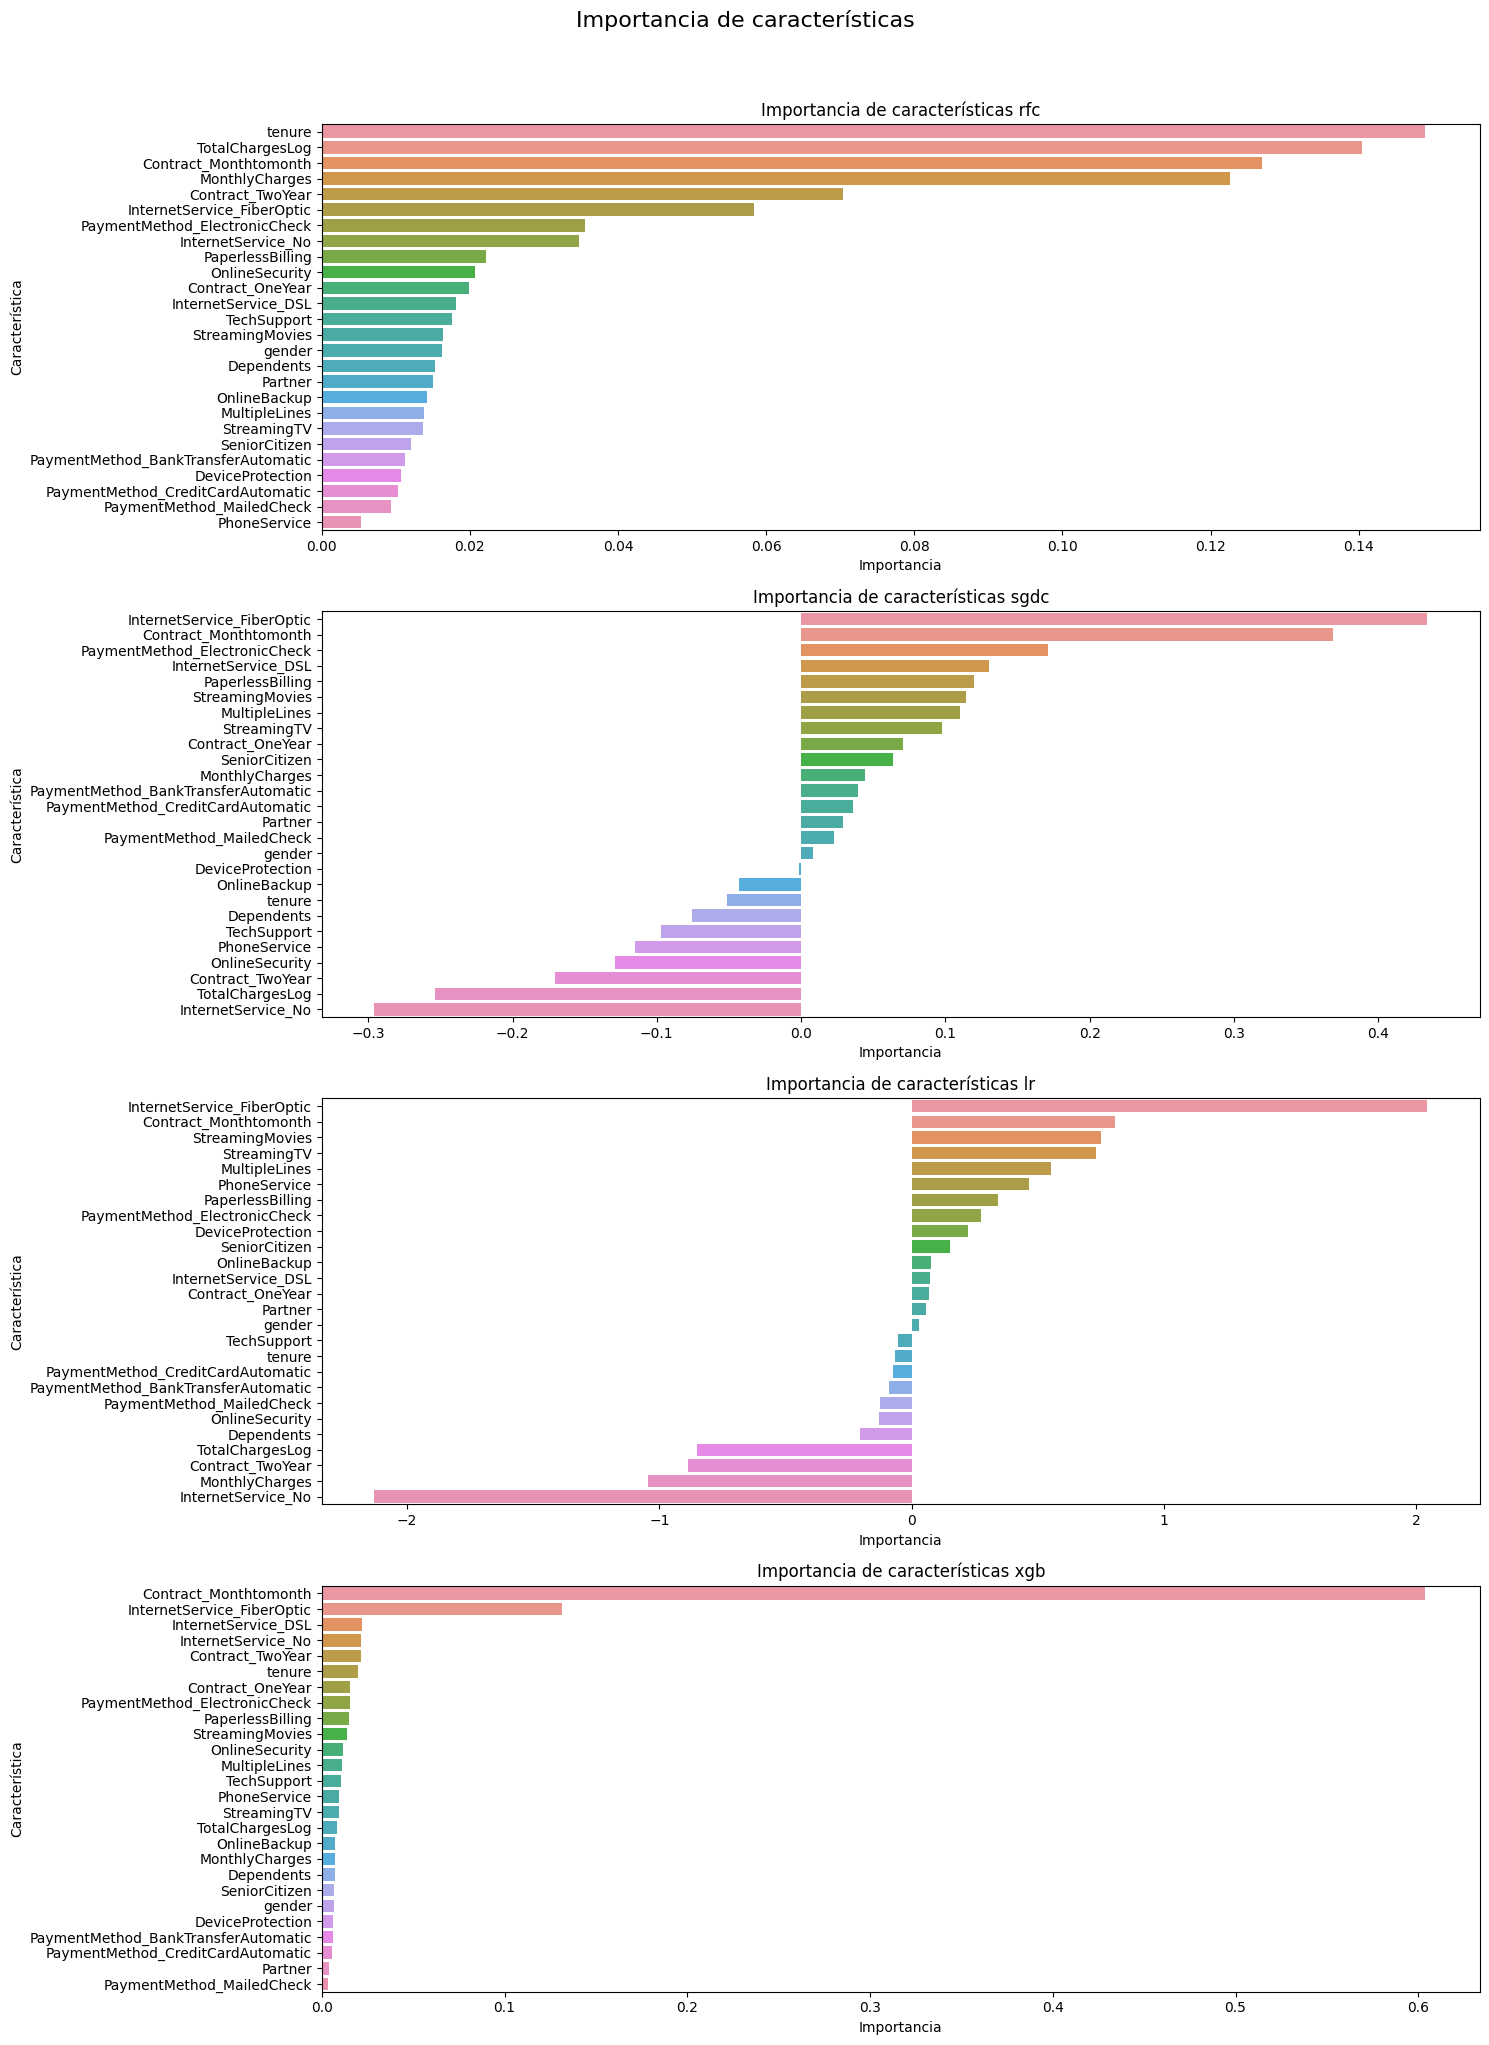

In [ ]:
plot_importancia_caracteristicas(importancia_df)

Del cuadro se visualiza lo siguiente:


*   Las decisiones depende en gran medida de la característica Contrato = Month to Month. Es lógico que haya mayor cantidad de Churn en dichos clientes, pues no están amarrados por años a un contrato
*   También se toma en cuienta la variable de Servicio de Internet = Fibra óptica, al parecer hay problemas con dicho servicio y la experiencia del cliente es pobre
*  Las variables numéricas son las más importantes para el Random Forest



# Selección de modelo
A continuación, se explican los criterios de la selección del modelo

In [ ]:
mostrar_df_estilizado(results_test)

model,accuracy,precision,recall,f1
rfc,0.769,0.549,0.735,0.629
sgdc,0.750,0.519,0.794,0.628
gnb,0.756,0.528,0.759,0.623
svc,0.749,0.518,0.781,0.623
lr,0.737,0.503,0.797,0.617
knn,0.800,0.635,0.580,0.606
xgb,0.796,0.639,0.529,0.579


*   Se ordenan los modelos por score F1
*   Se descarta el kNN y XGBoost porque si bien tienen buen accuracy y la mejor precisión, su recall es muy bajo, lo que los hace desbalanceados
*   Priorizamos el recall como segunda medida porque para nosotros es peor no detectar que un cliente va a cancelar su suscripción a darle una promoción a un cliente ya existente
*   Elegimos la Gradiente descendente estocástica por ser el más balanceado con mejor recall


# Pasos siguientes y posibles mejoras

*   Por limitaciones computacionales no se pudo hacer un Grid Search más exhaustivo, por lo que pueden haber combinaciones de hiperparámetros no evaluadas
*   Se podrían combinar los modelos en un ensamble para mejorar los indicadores
*   Se podrían utilizar técnicas de reducción de dimensionalidad para poder evaluar una mayor cantidad de modelos
*   Se podría buscar diferentes técnicas y metodologías de balanceo de conjunto de entrenamiento
